# Import Modules and Load Dataset

### Import Modules

In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn import linear_model, tree, ensemble
from warnings import simplefilter
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

### Load Dataset, Shuffle Dataset

In [2]:
df_base = pd.read_csv("BaseCrimeDemoDataset-v1.1.csv")
df_base = df_base.sample(frac=1)

### Data Duplication for experiment

In [3]:
# frames = [df_base, df_base.sample(frac=.10)]
# df_base = pd.concat(frames)

### Exploring Dataset

In [3]:
df_base

,id,incident_year,incident_month,incident_week,incident_weekday,weekend,part_of_the_day,latitude,longitude,incident_place,...,police_station,cyber_cafe,school,college,cinema,District,Upazilla,FixedLoca,crime,news_link
13,C_13,2019,2,7,saturday,1,morning,23.913894,90.320686,ashulia,...,6,16,42,10,3,dhaka,savar,savar,murder,https://www.thedailystar.net/city/ready-made-g...
5391,C_5391,2017,4,14,monday,0,morning,23.074400,88.866700,sharsha,...,2,1,33,8,1,jashore,sharsha,sharsha,bodyfound,https://www.thedailystar.net/country/schoolboy...
667,C_667,2015,9,38,friday,1,night,23.685475,90.448537,kadamtali,...,60,478,242,64,40,dhaka,dhaka metropolitan,dhaka metropolitan,bodyfound,https://www.thedailystar.net/city/bullet-hit-b...
3121,C_3121,2017,10,41,wednesday,0,morning,23.635000,89.550000,baliakandi,...,1,0,31,6,3,rajbari,baliakandi,baliakandi,rape,https://www.thedailystar.net/country/mentally-...
5092,C_5092,2018,4,15,tuesday,0,morning,24.683300,90.625000,iswarganj,...,2,0,24,1,2,mymensingh,ishwargonj,iswarganj,bodyfound,https://www.thedailystar.net/country/auto-rick...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,C_2770,2019,6,26,friday,1,morning,22.746100,89.967800,nazirpur,...,3,4,43,8,0,pirojpur,nazirpur,nazirpur,murder,https://www.thedailystar.net/country/six-sued-...
3798,C_3798,2013,3,11,tuesday,0,evening,26.350000,89.016670,patgram,...,2,0,27,8,2,lalmonirhat,patgram,patgram,rape,https://www.thedailystar.net/news/girl-raped-i...
5613,C_5613,2018,6,23,tuesday,0,night,25.016700,89.316700,shibganj,...,2,0,49,8,6,bogura,shibganj,shibganj,bodyfound,https://www.thedailystar.net/country/missing-b...
2145,C_2145,2019,10,40,tuesday,0,night,23.996158,90.419726,gazipur sadar,...,2,22,100,8,8,gazipur,gazipur sadar,gazipur sadar,murder,https://www.thedailystar.net/city/news/robbers...


In [4]:
df_base.columns

Index(['id', 'incident_year', 'incident_month', 'incident_week',
       'incident_weekday', 'weekend', 'part_of_the_day', 'latitude',
       'longitude', 'incident_place', 'incident_district', 'incident_division',
       'max_temp', 'avg_temp', 'min_temp', 'weather_code', 'precip',
       'humidity', 'visibility', 'cloudcover', 'heatindex', 'season',
       'weather_description', 'weather', 'distance_btn_areas',
       'distance_btn_dist', 'household', 'male_population',
       'female_population', 'total_population', 'gender_ration',
       'average_household_size', 'density_per_kmsq', 'literacy_rate',
       'religious_institution', 'playground', 'park', 'police_station',
       'cyber_cafe', 'school', 'college', 'cinema', 'District', 'Upazilla',
       'FixedLoca', 'crime', 'news_link'],
      dtype='object')

### Dataframe Column Dictionary for droping column

In [5]:
df_columns_dictionary = {
    'id':0,
    'incident_year':0,
    'incident_month':1,
    'incident_week':1,
    'incident_weekday':1,
    'weekend':1,
    'part_of_the_day':1,
    'latitude':1,
    'longitude':1,
    'incident_place':1,
    'incident_district':1,
    'incident_division':1,
    'max_temp':1,
    'avg_temp':1,
    'min_temp':1,
    'weather_code':1,
    'precip':1,
    'humidity':1,
    'visibility':1,
    'cloudcover':1,
    'heatindex':1,
    'season':1,
    'weather_description':0,
    'weather':1,
    'distance_btn_areas':1,
    'distance_btn_dist':1,
    'household':1,
    'male_population':1,
    'female_population':1,
    'total_population':1,
    'gender_ration':1,
    'average_household_size':1,
    'density_per_kmsq':1,
    'literacy_rate':1,
    'religious_institution':1,
    'playground':1,
    'park':1,
    'police_station':1,
    'cyber_cafe':1,
    'school':1,
    'college':1,
    'cinema':1,
    'District':0, 
    'Upazilla':0,
    'FixedLoca':0,
    'crime':1,
    'news_link':0
}

### Droping Unnecessary Columns

In [6]:
df_base_col = df_base.columns
df = df_base.copy()
for item in df_base_col:
    if df_columns_dictionary[item] == 0:
        df.drop([item], axis = 1, inplace=True)

# Data Preparation

In [7]:
df

,incident_month,incident_week,incident_weekday,weekend,part_of_the_day,latitude,longitude,incident_place,incident_district,incident_division,...,literacy_rate,religious_institution,playground,park,police_station,cyber_cafe,school,college,cinema,crime
13,2,7,saturday,1,morning,23.913894,90.320686,ashulia,dhaka,dhaka,...,68.0,1118,78,3,6,16,42,10,3,murder
5391,4,14,monday,0,morning,23.074400,88.866700,sharsha,jashore,khulna,...,49.8,407,31,0,2,1,33,8,1,bodyfound
667,9,38,friday,1,night,23.685475,90.448537,kadamtali,dhaka,dhaka,...,74.6,4289,99,17,60,478,242,64,40,bodyfound
3121,10,41,wednesday,0,morning,23.635000,89.550000,baliakandi,rajbari,dhaka,...,55.5,589,5,1,1,0,31,6,3,rape
5092,4,15,tuesday,0,morning,24.683300,90.625000,iswarganj,mymensingh,mymensingh,...,41.0,860,15,0,2,0,24,1,2,bodyfound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,6,26,friday,1,morning,22.746100,89.967800,nazirpur,pirojpur,barisal,...,59.3,1187,70,0,3,4,43,8,0,murder
3798,3,11,tuesday,0,evening,26.350000,89.016670,patgram,lalmonirhat,rangpur,...,46.1,438,1,1,2,0,27,8,2,rape
5613,6,23,tuesday,0,night,25.016700,89.316700,shibganj,bogura,rajshahi,...,44.1,1205,66,0,2,0,49,8,6,bodyfound
2145,10,40,tuesday,0,night,23.996158,90.419726,gazipur sadar,gazipur,dhaka,...,60.6,854,1,15,2,22,100,8,8,murder


In [8]:
df.columns

Index(['incident_month', 'incident_week', 'incident_weekday', 'weekend',
       'part_of_the_day', 'latitude', 'longitude', 'incident_place',
       'incident_district', 'incident_division', 'max_temp', 'avg_temp',
       'min_temp', 'weather_code', 'precip', 'humidity', 'visibility',
       'cloudcover', 'heatindex', 'season', 'weather', 'distance_btn_areas',
       'distance_btn_dist', 'household', 'male_population',
       'female_population', 'total_population', 'gender_ration',
       'average_household_size', 'density_per_kmsq', 'literacy_rate',
       'religious_institution', 'playground', 'park', 'police_station',
       'cyber_cafe', 'school', 'college', 'cinema', 'crime'],
      dtype='object')

### List of Numerical and categorical Features

In [9]:
numerical_features = ['latitude', 'longitude', 'max_temp', 'avg_temp',
       'min_temp', 'precip', 'humidity', 'visibility',
       'cloudcover', 'heatindex', 'distance_btn_areas',
       'distance_btn_dist', 'household', 'male_population',
       'female_population', 'total_population', 'gender_ration',
       'average_household_size', 'density_per_kmsq', 'literacy_rate',
       'religious_institution', 'playground', 'park', 'police_station',
       'cyber_cafe', 'school', 'college', 'cinema']

In [10]:
categorical_features = ['incident_weekday', 'part_of_the_day', 'incident_place', 'incident_district', 'incident_division', 'weather_code', 'season', 'weather']

### Utility: Encoding

In [11]:
def LabelEncoding(df, col_name):
    le = LabelEncoder()
    labels = le.fit_transform(df[col_name])
    mappings = {index: label for index, label in enumerate(le.classes_)}
    return labels, mappings

def OneHotEncoding(df, col_name):
    onehot_features = pd.get_dummies(df[col_name])
    df = pd.concat([df, onehot_features], axis = 1)
    return df

def DummyEncoding(df, col_name):
    dummy_features = pd.get_dummies(df[col_name], drop_first = True)
    df = pd.concat([df, dummy_features], axis = 1)
    return df

In [12]:
def ApplyEncoding(df, categorical_features):
    for item in categorical_features:
        try:
            df[item],_ = LabelEncoding(df,item)
        except:
            pass
    return df

### Utility: Scaling

In [13]:
def MinMaxScaling(df, numerical_features):
    # from sklearn.preprocessing import StandardScaler
    # scaler = StandardScaler()
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    for item in numerical_features:
        try:
            df[[item]] = scaler.fit_transform(df[[item]])
        except:
            pass
    return df

### Utility: Show Performance

In [14]:
def ModelPerformance(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    confusion = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(confusion)
    print('\nAccuracy per Class:')
    accuracy = confusion.diagonal()/confusion.sum(axis=1)
    print(f"Assault: {accuracy[0]*100}")
    print(f"BodyFound: {accuracy[1]*100}")
    print(f"Kidnap: {accuracy[2]*100}")
    print(f"Murder: {accuracy[3]*100}")
    print(f"Rape: {accuracy[4]*100}")
    print(f"Robbery: {accuracy[5]*100}")

    #importing accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))    
    print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
    from sklearn.metrics import classification_report
    print('Classification Report\n')
    print(classification_report(y_test, y_pred, target_names=['Assault', 'BodyFound', 'Kidnap', 'Murder', 'Rape', 'Robbery']))

### Utility: Feature Drop

In [15]:
def DropFeature(df, features):
    # df = df.drop(['incident_place', 'incident_district', 'FixedLoca'], axis = 1)
    for item in features:
        try:
            df = df.drop([item], axis = 1)
        except:
            pass
    return df

### Utility: Split Dataset

In [16]:
def SplitDataset(X,y,test_size = 0.20):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)
    return X_train, X_test, y_train, y_test

### Utility Prepare Dataset

In [17]:
def PrepareDataset(df_main, feature_drop=[]):
    df = df_main.copy()
    df = MinMaxScaling(df, numerical_features)
    df = ApplyEncoding(df, categorical_features)
    df = DropFeature(df, feature_drop)
    df['crime'],crime_codes = LabelEncoding(df,'crime')
    y = df.loc[:,'crime']
    X = df.drop(['crime'], axis=1)
    return X,y

# Model

In [18]:
X,y = PrepareDataset(df)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

## All Feature

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 5000 ,criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
# classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 39 artists>

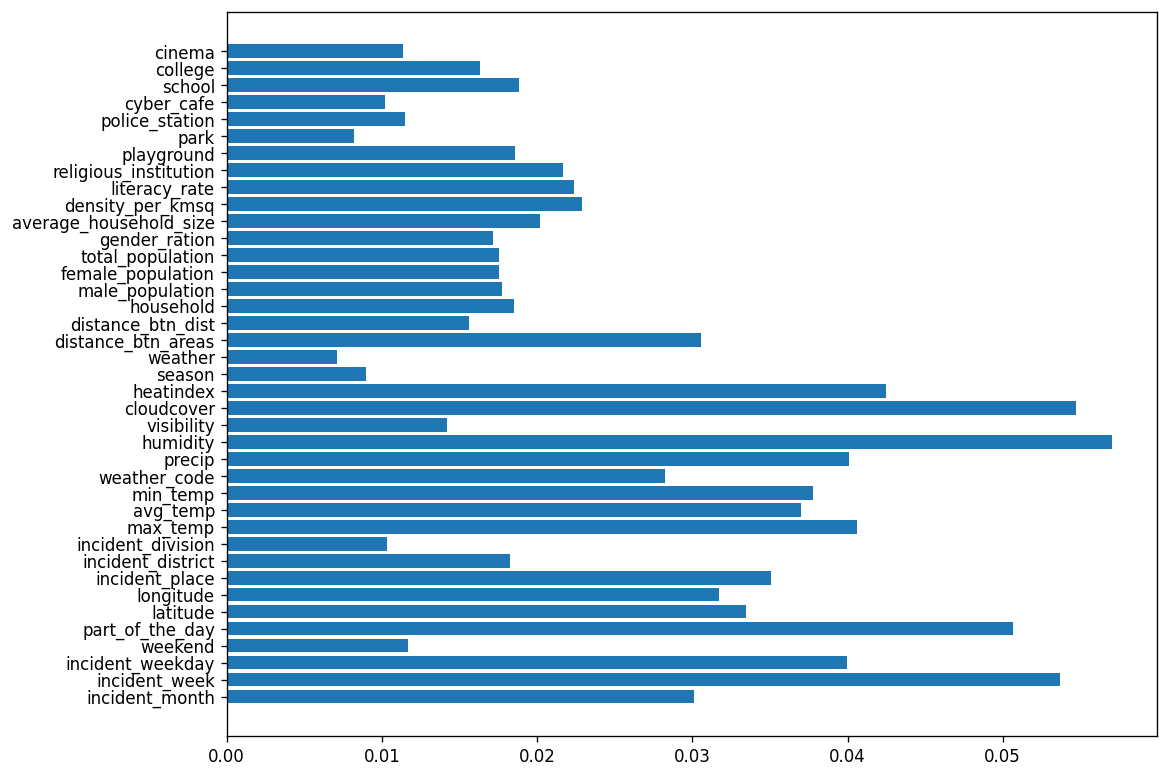

In [35]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [36]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[35 22  1 24 16  4]
 [19 79  3 28 17  4]
 [ 9 23 15  8  8  1]
 [18 26  4 80 24  2]
 [ 6 22  4 37 51  4]
 [ 7 17  1  9 15 15]]

Accuracy per Class:
Assault: 34.31372549019608
BodyFound: 52.666666666666664
Kidnap: 23.4375
Murder: 51.94805194805194
Rape: 41.12903225806452
Robbery: 23.4375

Accuracy: 0.42

Micro Precision: 0.42
Micro Recall: 0.42
Micro F1-score: 0.42

Macro Precision: 0.44
Macro Recall: 0.38
Macro F1-score: 0.39

Weighted Precision: 0.43
Weighted Recall: 0.42
Weighted F1-score: 0.41
Classification Report

              precision    recall  f1-score   support

     Assault       0.37      0.34      0.36       102
   BodyFound       0.42      0.53      0.47       150
      Kidnap       0.54      0.23      0.33        64
      Murder       0.43      0.52      0.47       154
        Rape       0.39      0.41      0.40       124
     Robbery       0.50      0.23      0.32        64

### Random Forest: max_depth = 30, min_sample_leaf = 10

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 2000, max_depth = 10, min_samples_leaf = 5, criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=2000,
                       random_state=0)

Feature Importance:


<BarContainer object of 39 artists>

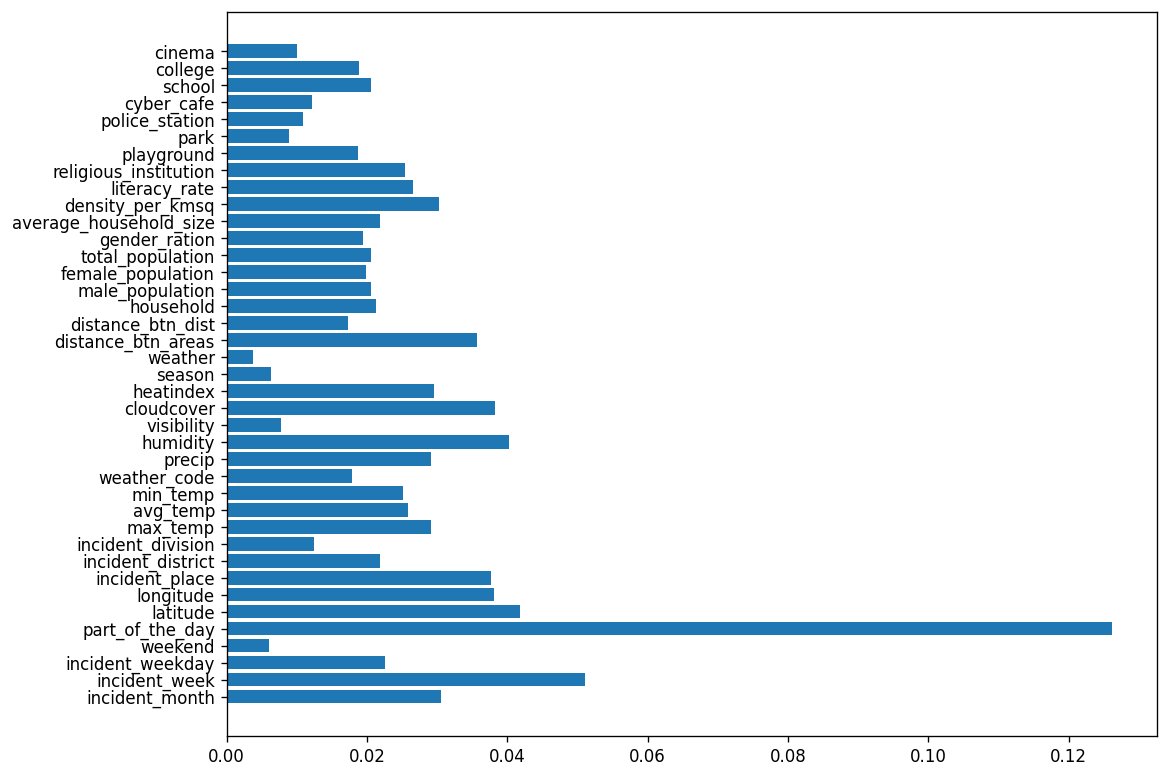

In [38]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [39]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[26 30  0 32 13  1]
 [10 87  2 27 23  1]
 [ 6 31  4 12 10  1]
 [ 8 38  1 92 15  0]
 [ 3 29  1 41 48  2]
 [ 9 18  0 15 15  7]]

Accuracy per Class:
Assault: 25.49019607843137
BodyFound: 57.99999999999999
Kidnap: 6.25
Murder: 59.74025974025974
Rape: 38.70967741935484
Robbery: 10.9375

Accuracy: 0.40

Micro Precision: 0.40
Micro Recall: 0.40
Micro F1-score: 0.40

Macro Precision: 0.45
Macro Recall: 0.33
Macro F1-score: 0.32

Weighted Precision: 0.43
Weighted Recall: 0.40
Weighted F1-score: 0.37
Classification Report

              precision    recall  f1-score   support

     Assault       0.42      0.25      0.32       102
   BodyFound       0.37      0.58      0.45       150
      Kidnap       0.50      0.06      0.11        64
      Murder       0.42      0.60      0.49       154
        Rape       0.39      0.39      0.39       124
     Robbery       0.58      0.11      0.18        64

  

### XGBoost

Feature Importance:


<BarContainer object of 39 artists>

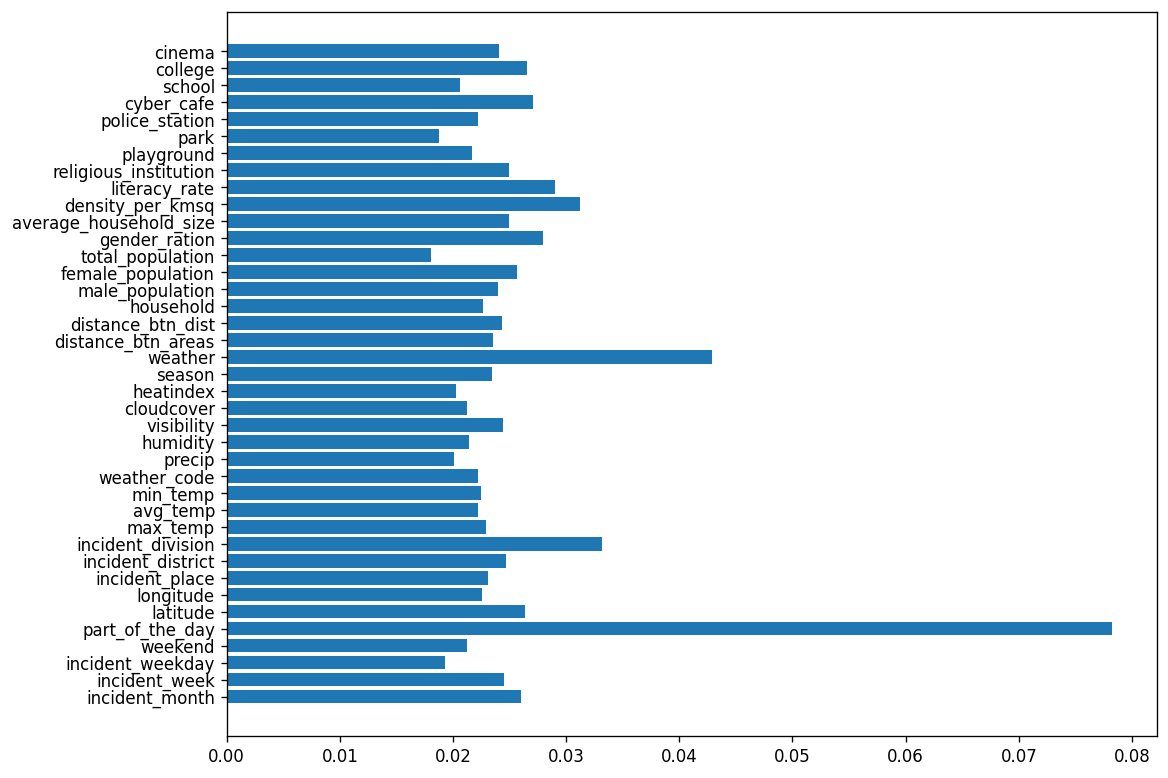

In [42]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 100,learning_rate=0.3,max_depth = 10)
classifier.fit(X_train, y_train)
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [43]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[35 16  2 31 12  6]
 [17 81  5 22 19  6]
 [ 7 18 17 11  9  2]
 [24 23  3 72 28  4]
 [13 21  5 31 51  3]
 [ 7 18  0 10 13 16]]

Accuracy per Class:
Assault: 34.31372549019608
BodyFound: 54.0
Kidnap: 26.5625
Murder: 46.75324675324675
Rape: 41.12903225806452
Robbery: 25.0

Accuracy: 0.41

Micro Precision: 0.41
Micro Recall: 0.41
Micro F1-score: 0.41

Macro Precision: 0.43
Macro Recall: 0.38
Macro F1-score: 0.39

Weighted Precision: 0.42
Weighted Recall: 0.41
Weighted F1-score: 0.41
Classification Report

              precision    recall  f1-score   support

     Assault       0.34      0.34      0.34       102
   BodyFound       0.46      0.54      0.50       150
      Kidnap       0.53      0.27      0.35        64
      Murder       0.41      0.47      0.44       154
        Rape       0.39      0.41      0.40       124
     Robbery       0.43      0.25      0.32        64

    accuracy                           0.41       658
   macro avg       0

### SVM

In [44]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
from sklearn import svm

#### RBF

In [45]:
classifier_rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [46]:
y_pred = classifier_rbf.predict(X_test)
y_train_pred = classifier_rbf.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[  8  91   0   3   0   0]
 [  2 142   0   4   2   0]
 [  0  52   6   2   3   1]
 [  3 121   2  25   3   0]
 [  1  97   0   9  17   0]
 [  1  53   0   2   1   7]]

Accuracy per Class:
Assault: 7.8431372549019605
BodyFound: 94.66666666666667
Kidnap: 9.375
Murder: 16.233766233766232
Rape: 13.709677419354838
Robbery: 10.9375

Accuracy: 0.31

Micro Precision: 0.31
Micro Recall: 0.31
Micro F1-score: 0.31

Macro Precision: 0.60
Macro Recall: 0.25
Macro F1-score: 0.23

Weighted Precision: 0.55
Weighted Recall: 0.31
Weighted F1-score: 0.25
Classification Report

              precision    recall  f1-score   support

     Assault       0.53      0.08      0.14       102
   BodyFound       0.26      0.95      0.40       150
      Kidnap       0.75      0.09      0.17        64
      Murder       0.56      0.16      0.25       154
        Rape       0.65      0.14      0.23       124
     Robbery       0.88      0.11      0.19        64

    accuracy         

#### Poly

In [47]:
classifier_poly = svm.SVC(kernel='poly', degree=10, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [48]:
y_pred = classifier_poly.predict(X_test)
y_train_pred = classifier_poly.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[  3   5   0  93   1   0]
 [  3  20   0 124   1   2]
 [  0  10   0  52   1   1]
 [  2  10   0 141   1   0]
 [  2   9   0 111   2   0]
 [  0   9   0  53   1   1]]

Accuracy per Class:
Assault: 2.941176470588235
BodyFound: 13.333333333333334
Kidnap: 0.0
Murder: 91.55844155844156
Rape: 1.6129032258064515
Robbery: 1.5625

Accuracy: 0.25

Micro Precision: 0.25
Micro Recall: 0.25
Micro F1-score: 0.25

Macro Precision: 0.23
Macro Recall: 0.19
Macro F1-score: 0.11

Weighted Precision: 0.25
Weighted Recall: 0.25
Weighted F1-score: 0.15
Classification Report

              precision    recall  f1-score   support

     Assault       0.30      0.03      0.05       102
   BodyFound       0.32      0.13      0.19       150
      Kidnap       0.00      0.00      0.00        64
      Murder       0.25      0.92      0.39       154
        Rape       0.29      0.02      0.03       124
     Robbery       0.25      0.02      0.03        64

    accuracy             

/home/faisaltareque/anaconda3/envs/PythonEnv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faisaltareque/anaconda3/envs/PythonEnv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faisaltareque/anaconda3/envs/PythonEnv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

#### Sigmoid

In [49]:
classifier_sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [50]:
y_pred = classifier_sig.predict(X_test)
y_train_pred = classifier_sig.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[53 43  0  6  0  0]
 [58 77  0 15  0  0]
 [31 30  0  3  0  0]
 [57 73  0 24  0  0]
 [59 54  0 11  0  0]
 [18 34  0 12  0  0]]

Accuracy per Class:
Assault: 51.9607843137255
BodyFound: 51.33333333333333
Kidnap: 0.0
Murder: 15.584415584415584
Rape: 0.0
Robbery: 0.0

Accuracy: 0.23

Micro Precision: 0.23
Micro Recall: 0.23
Micro F1-score: 0.23

Macro Precision: 0.13
Macro Recall: 0.20
Macro F1-score: 0.14

Weighted Precision: 0.17
Weighted Recall: 0.23
Weighted F1-score: 0.17
Classification Report

              precision    recall  f1-score   support

     Assault       0.19      0.52      0.28       102
   BodyFound       0.25      0.51      0.33       150
      Kidnap       0.00      0.00      0.00        64
      Murder       0.34      0.16      0.21       154
        Rape       0.00      0.00      0.00       124
     Robbery       0.00      0.00      0.00        64

    accuracy                           0.23       658
   macro avg       0.13   

/home/faisaltareque/anaconda3/envs/PythonEnv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faisaltareque/anaconda3/envs/PythonEnv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faisaltareque/anaconda3/envs/PythonEnv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

#### Linear

In [51]:
# classifier_linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [52]:
# y_pred = classifier_linear.predict(X_test)
# y_train_pred = classifier_linear.predict(X_train)
# print("Test Performance: \n")
# ModelPerformance(y_test,y_pred)
# print("\nTrain Performance: \n")
# ModelPerformance(y_train,y_train_pred)

### Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [54]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[  2   6   5  59  15  15]
 [  2   6  12  79  31  20]
 [  1   1   6  35  17   4]
 [  3   5   5 104  24  13]
 [  2   2  11  63  35  11]
 [  1   1   6  24  13  19]]

Accuracy per Class:
Assault: 1.9607843137254901
BodyFound: 4.0
Kidnap: 9.375
Murder: 67.53246753246754
Rape: 28.225806451612907
Robbery: 29.6875

Accuracy: 0.26

Micro Precision: 0.26
Micro Recall: 0.26
Micro F1-score: 0.26

Macro Precision: 0.23
Macro Recall: 0.23
Macro F1-score: 0.19

Weighted Precision: 0.24
Weighted Recall: 0.26
Weighted F1-score: 0.20
Classification Report

              precision    recall  f1-score   support

     Assault       0.18      0.02      0.04       102
   BodyFound       0.29      0.04      0.07       150
      Kidnap       0.13      0.09      0.11        64
      Murder       0.29      0.68      0.40       154
        Rape       0.26      0.28      0.27       124
     Robbery       0.23      0.30      0.26        64

    accuracy                        

### Decision Tree

Feature Importance:


<BarContainer object of 39 artists>

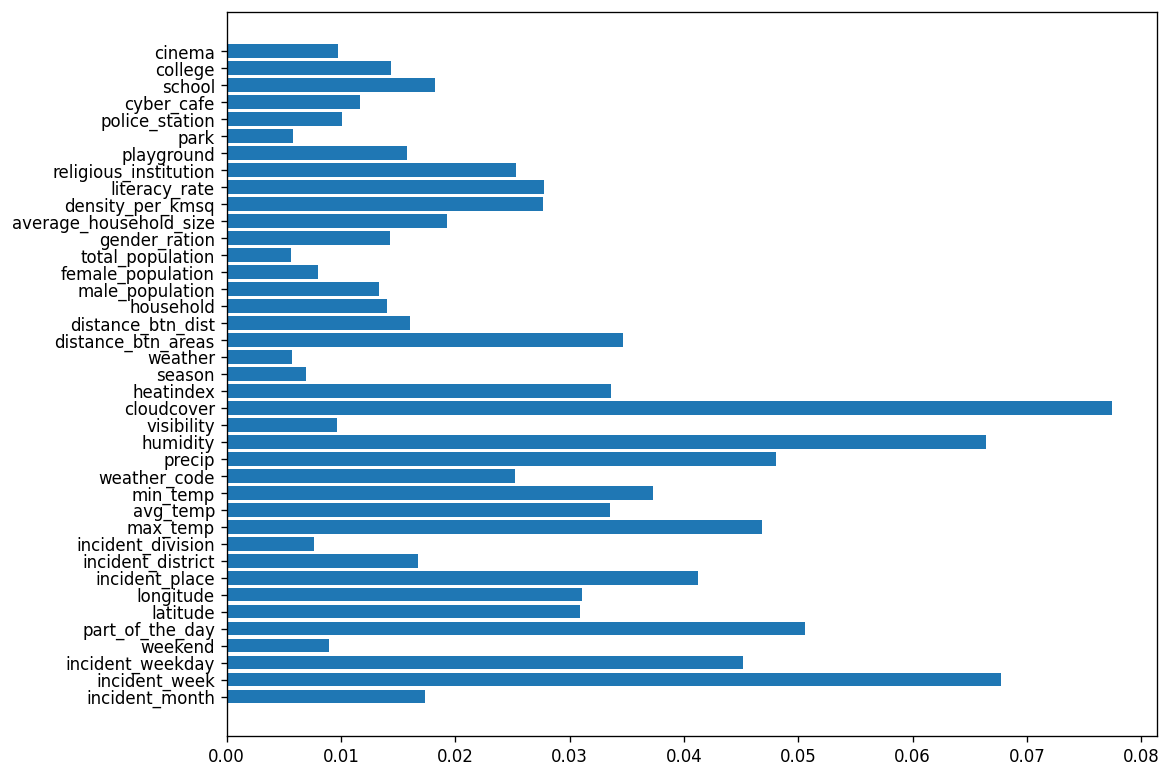

In [61]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 20,criterion = 'gini')
classifier.fit(X_train, y_train)
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
print("Feature Importance:")
plt.barh(X.columns, classifier.feature_importances_)

In [62]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[28 24  7 25  9  9]
 [23 55 17 24 19 12]
 [ 9 19 14 14  6  2]
 [27 21 10 54 27 15]
 [13 22 10 30 42  7]
 [13 11  4  8 11 17]]

Accuracy per Class:
Assault: 27.450980392156865
BodyFound: 36.666666666666664
Kidnap: 21.875
Murder: 35.064935064935064
Rape: 33.87096774193548
Robbery: 26.5625

Accuracy: 0.32

Micro Precision: 0.32
Micro Recall: 0.32
Micro F1-score: 0.32

Macro Precision: 0.30
Macro Recall: 0.30
Macro F1-score: 0.30

Weighted Precision: 0.32
Weighted Recall: 0.32
Weighted F1-score: 0.32
Classification Report

              precision    recall  f1-score   support

     Assault       0.25      0.27      0.26       102
   BodyFound       0.36      0.37      0.36       150
      Kidnap       0.23      0.22      0.22        64
      Murder       0.35      0.35      0.35       154
        Rape       0.37      0.34      0.35       124
     Robbery       0.27      0.27      0.27        64

    accuracy                           0.32       658
  

### Ada-Boost

In [57]:
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1)
classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [58]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[13 37  1 37 13  1]
 [16 75  3 30 19  7]
 [ 5 25  4 13 15  2]
 [10 34  2 79 22  7]
 [14 19  2 50 31  8]
 [ 6 15  0 18 15 10]]

Accuracy per Class:
Assault: 12.745098039215685
BodyFound: 50.0
Kidnap: 6.25
Murder: 51.298701298701296
Rape: 25.0
Robbery: 15.625

Accuracy: 0.32

Micro Precision: 0.32
Micro Recall: 0.32
Micro F1-score: 0.32

Macro Precision: 0.30
Macro Recall: 0.27
Macro F1-score: 0.26

Weighted Precision: 0.31
Weighted Recall: 0.32
Weighted F1-score: 0.30
Classification Report

              precision    recall  f1-score   support

     Assault       0.20      0.13      0.16       102
   BodyFound       0.37      0.50      0.42       150
      Kidnap       0.33      0.06      0.11        64
      Murder       0.35      0.51      0.41       154
        Rape       0.27      0.25      0.26       124
     Robbery       0.29      0.16      0.20        64

    accuracy                           0.32       658
   macro avg       0.30      0.2

### Extra-Tree

In [59]:
classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [60]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[38 18  2 20 18  6]
 [20 81  3 31 10  5]
 [ 8 18 16 12  9  1]
 [20 25  8 74 24  3]
 [10 23  5 33 50  3]
 [ 9 15  2  4 16 18]]

Accuracy per Class:
Assault: 37.254901960784316
BodyFound: 54.0
Kidnap: 25.0
Murder: 48.05194805194805
Rape: 40.32258064516129
Robbery: 28.125

Accuracy: 0.42

Micro Precision: 0.42
Micro Recall: 0.42
Micro F1-score: 0.42

Macro Precision: 0.43
Macro Recall: 0.39
Macro F1-score: 0.40

Weighted Precision: 0.42
Weighted Recall: 0.42
Weighted F1-score: 0.42
Classification Report

              precision    recall  f1-score   support

     Assault       0.36      0.37      0.37       102
   BodyFound       0.45      0.54      0.49       150
      Kidnap       0.44      0.25      0.32        64
      Murder       0.43      0.48      0.45       154
        Rape       0.39      0.40      0.40       124
     Robbery       0.50      0.28      0.36        64

    accuracy                           0.42       658
   macro avg       0

## After Removing Low Important Feature

In [63]:
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema']
X,y = PrepareDataset(df, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 29 artists>

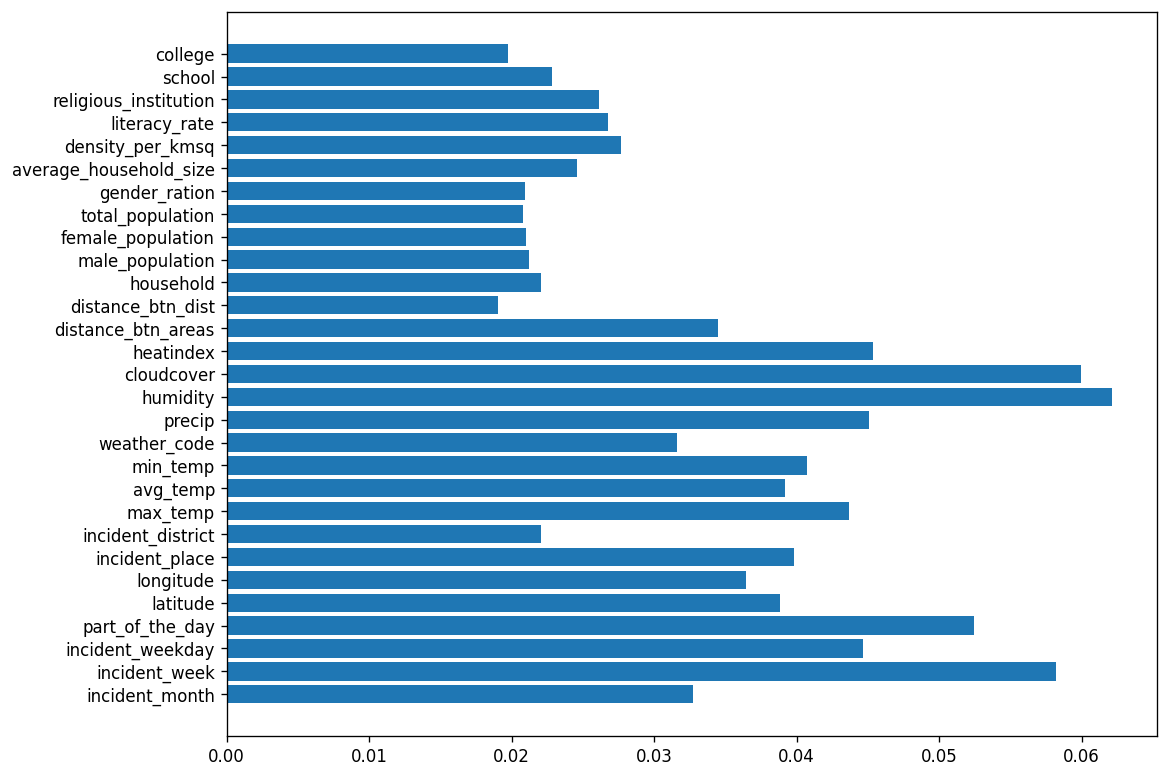

In [65]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [66]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[37 25  2 20 14  4]
 [21 77  5 27 16  4]
 [ 9 25 15  7  7  1]
 [20 26  5 78 23  2]
 [ 9 20  4 38 51  2]
 [ 6 18  1 10 14 15]]

Accuracy per Class:
Assault: 36.27450980392157
BodyFound: 51.33333333333333
Kidnap: 23.4375
Murder: 50.649350649350644
Rape: 41.12903225806452
Robbery: 23.4375

Accuracy: 0.41

Micro Precision: 0.41
Micro Recall: 0.41
Micro F1-score: 0.41

Macro Precision: 0.44
Macro Recall: 0.38
Macro F1-score: 0.39

Weighted Precision: 0.42
Weighted Recall: 0.41
Weighted F1-score: 0.41
Classification Report

              precision    recall  f1-score   support

     Assault       0.36      0.36      0.36       102
   BodyFound       0.40      0.51      0.45       150
      Kidnap       0.47      0.23      0.31        64
      Murder       0.43      0.51      0.47       154
        Rape       0.41      0.41      0.41       124
     Robbery       0.54      0.23      0.33        64

### XGBoost

Feature Importance:


<BarContainer object of 29 artists>

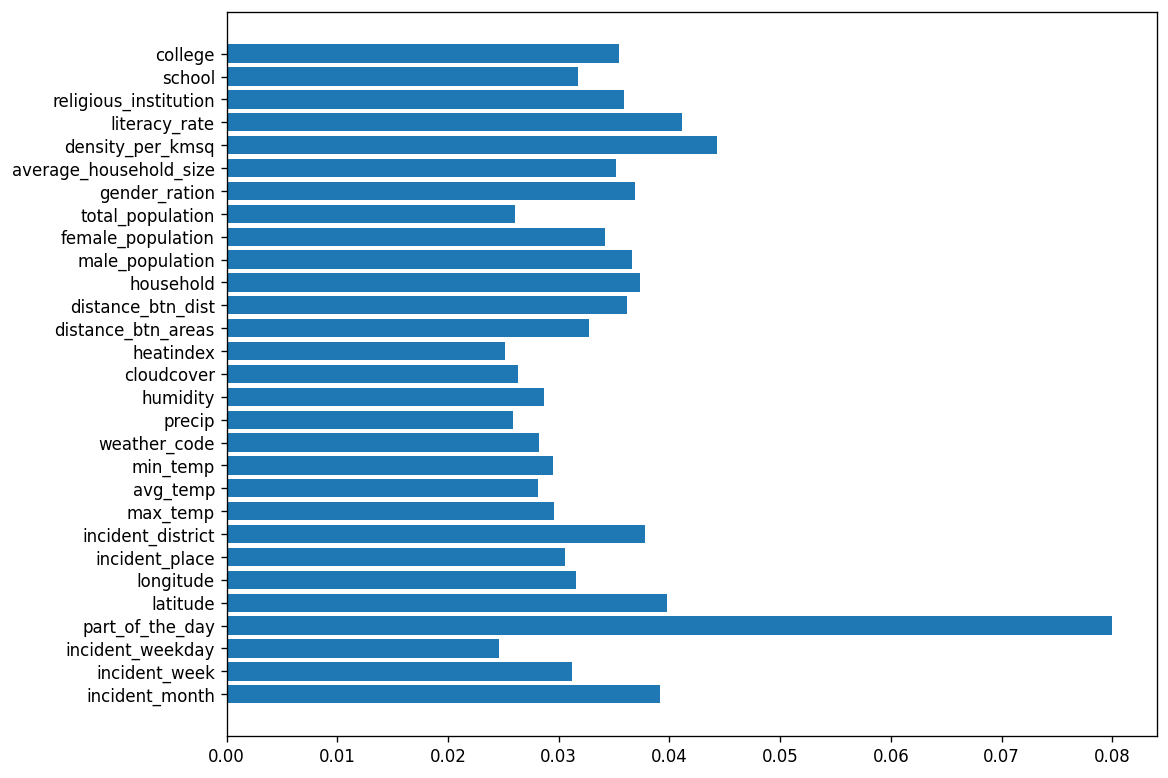

In [68]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 1000)
classifier.fit(X_train, y_train)
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [69]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[33 17  3 27 17  5]
 [19 76 11 26 16  2]
 [ 7 20 17  8 10  2]
 [23 22  3 75 26  5]
 [ 9 19  7 33 49  7]
 [ 8 14  0 10 16 16]]

Accuracy per Class:
Assault: 32.35294117647059
BodyFound: 50.66666666666667
Kidnap: 26.5625
Murder: 48.701298701298704
Rape: 39.516129032258064
Robbery: 25.0

Accuracy: 0.40

Micro Precision: 0.40
Micro Recall: 0.40
Micro F1-score: 0.40

Macro Precision: 0.40
Macro Recall: 0.37
Macro F1-score: 0.38

Weighted Precision: 0.40
Weighted Recall: 0.40
Weighted F1-score: 0.40
Classification Report

              precision    recall  f1-score   support

     Assault       0.33      0.32      0.33       102
   BodyFound       0.45      0.51      0.48       150
      Kidnap       0.41      0.27      0.32        64
      Murder       0.42      0.49      0.45       154
        Rape       0.37      0.40      0.38       124
     Robbery       0.43      0.25      0.32        64

    accuracy                           0.40       658
   ma

### SVM

In [70]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
from sklearn import svm

#### RBF

In [71]:
classifier_rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [72]:
y_pred = classifier_rbf.predict(X_test)
y_train_pred = classifier_rbf.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[  8  91   0   3   0   0]
 [  2 140   0   6   2   0]
 [  0  51   6   3   3   1]
 [  3 119   2  27   3   0]
 [  1  97   0   9  17   0]
 [  1  53   0   2   1   7]]

Accuracy per Class:
Assault: 7.8431372549019605
BodyFound: 93.33333333333333
Kidnap: 9.375
Murder: 17.532467532467532
Rape: 13.709677419354838
Robbery: 10.9375

Accuracy: 0.31

Micro Precision: 0.31
Micro Recall: 0.31
Micro F1-score: 0.31

Macro Precision: 0.60
Macro Recall: 0.25
Macro F1-score: 0.23

Weighted Precision: 0.55
Weighted Recall: 0.31
Weighted F1-score: 0.25
Classification Report

              precision    recall  f1-score   support

     Assault       0.53      0.08      0.14       102
   BodyFound       0.25      0.93      0.40       150
      Kidnap       0.75      0.09      0.17        64
      Murder       0.54      0.18      0.26       154
        Rape       0.65      0.14      0.23       124
     Robbery       0.88      0.11      0.19        64

    accuracy         

#### Poly

In [73]:
classifier_poly = svm.SVC(kernel='poly', degree=10, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [74]:
y_pred = classifier_poly.predict(X_test)
y_train_pred = classifier_poly.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[  2   6   0  93   1   0]
 [  4  19   0 124   1   2]
 [  0   9   0  53   1   1]
 [  2   9   0 142   1   0]
 [  2  10   0 111   1   0]
 [  0   9   0  53   1   1]]

Accuracy per Class:
Assault: 1.9607843137254901
BodyFound: 12.666666666666668
Kidnap: 0.0
Murder: 92.20779220779221
Rape: 0.8064516129032258
Robbery: 1.5625

Accuracy: 0.25

Micro Precision: 0.25
Micro Recall: 0.25
Micro F1-score: 0.25

Macro Precision: 0.19
Macro Recall: 0.18
Macro F1-score: 0.11

Weighted Precision: 0.21
Weighted Recall: 0.25
Weighted F1-score: 0.14
Classification Report

              precision    recall  f1-score   support

     Assault       0.20      0.02      0.04       102
   BodyFound       0.31      0.13      0.18       150
      Kidnap       0.00      0.00      0.00        64
      Murder       0.25      0.92      0.39       154
        Rape       0.17      0.01      0.02       124
     Robbery       0.25      0.02      0.03        64

    accuracy            

/home/faisaltareque/anaconda3/envs/PythonEnv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faisaltareque/anaconda3/envs/PythonEnv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faisaltareque/anaconda3/envs/PythonEnv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

#### Sigmoid

In [75]:
classifier_sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [76]:
y_pred = classifier_sig.predict(X_test)
y_train_pred = classifier_sig.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[53 43  0  6  0  0]
 [58 77  0 15  0  0]
 [32 30  0  2  0  0]
 [59 72  0 23  0  0]
 [60 54  0 10  0  0]
 [19 34  0 11  0  0]]

Accuracy per Class:
Assault: 51.9607843137255
BodyFound: 51.33333333333333
Kidnap: 0.0
Murder: 14.935064935064934
Rape: 0.0
Robbery: 0.0

Accuracy: 0.23

Micro Precision: 0.23
Micro Recall: 0.23
Micro F1-score: 0.23

Macro Precision: 0.13
Macro Recall: 0.20
Macro F1-score: 0.14

Weighted Precision: 0.17
Weighted Recall: 0.23
Weighted F1-score: 0.17
Classification Report

              precision    recall  f1-score   support

     Assault       0.19      0.52      0.28       102
   BodyFound       0.25      0.51      0.33       150
      Kidnap       0.00      0.00      0.00        64
      Murder       0.34      0.15      0.21       154
        Rape       0.00      0.00      0.00       124
     Robbery       0.00      0.00      0.00        64

    accuracy                           0.23       658
   macro avg       0.13   

/home/faisaltareque/anaconda3/envs/PythonEnv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faisaltareque/anaconda3/envs/PythonEnv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faisaltareque/anaconda3/envs/PythonEnv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

#### Linear

In [77]:
# classifier_linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [78]:
# y_pred = classifier_linear.predict(X_test)
# y_train_pred = classifier_linear.predict(X_train)
# print("Test Performance: \n")
# ModelPerformance(y_test,y_pred)
# print("\nTrain Performance: \n")
# ModelPerformance(y_train,y_train_pred)

### Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [80]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[  2   5   2  58  20  15]
 [  4   3  10  76  37  20]
 [  2   0   5  34  19   4]
 [  2   4   4 103  28  13]
 [  2   4   8  66  33  11]
 [  1   0   3  24  17  19]]

Accuracy per Class:
Assault: 1.9607843137254901
BodyFound: 2.0
Kidnap: 7.8125
Murder: 66.88311688311688
Rape: 26.61290322580645
Robbery: 29.6875

Accuracy: 0.25

Micro Precision: 0.25
Micro Recall: 0.25
Micro F1-score: 0.25

Macro Precision: 0.20
Macro Recall: 0.22
Macro F1-score: 0.18

Weighted Precision: 0.21
Weighted Recall: 0.25
Weighted F1-score: 0.19
Classification Report

              precision    recall  f1-score   support

     Assault       0.15      0.02      0.03       102
   BodyFound       0.19      0.02      0.04       150
      Kidnap       0.16      0.08      0.10        64
      Murder       0.29      0.67      0.40       154
        Rape       0.21      0.27      0.24       124
     Robbery       0.23      0.30      0.26        64

    accuracy                        

### Decision Tree

Feature Importance:


<BarContainer object of 29 artists>

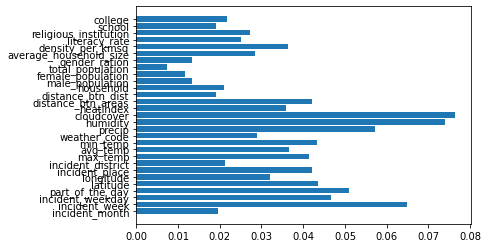

In [81]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 20,criterion = 'gini')
classifier.fit(X_train, y_train)
print("Feature Importance:")
plt.barh(X.columns, classifier.feature_importances_)

In [82]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[33 17  9 25 13  5]
 [28 57 15 20 20 10]
 [13 16 15  8  9  3]
 [27 24 13 53 28  9]
 [15 19 10 36 40  4]
 [10 12  2 15 13 12]]

Accuracy per Class:
Assault: 32.35294117647059
BodyFound: 38.0
Kidnap: 23.4375
Murder: 34.41558441558442
Rape: 32.25806451612903
Robbery: 18.75

Accuracy: 0.32

Micro Precision: 0.32
Micro Recall: 0.32
Micro F1-score: 0.32

Macro Precision: 0.31
Macro Recall: 0.30
Macro F1-score: 0.30

Weighted Precision: 0.32
Weighted Recall: 0.32
Weighted F1-score: 0.32
Classification Report

              precision    recall  f1-score   support

     Assault       0.26      0.32      0.29       102
   BodyFound       0.39      0.38      0.39       150
      Kidnap       0.23      0.23      0.23        64
      Murder       0.34      0.34      0.34       154
        Rape       0.33      0.32      0.32       124
     Robbery       0.28      0.19      0.22        64

    accuracy                           0.32       658
   macro avg       

### Ada-Boost

In [83]:
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1)
classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [84]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[15 35  0 40 11  1]
 [16 76  5 28 19  6]
 [ 7 23  4 16 12  2]
 [10 30  1 80 25  8]
 [15 19  1 50 32  7]
 [ 5 15  0 19 15 10]]

Accuracy per Class:
Assault: 14.705882352941178
BodyFound: 50.66666666666667
Kidnap: 6.25
Murder: 51.94805194805194
Rape: 25.806451612903224
Robbery: 15.625

Accuracy: 0.33

Micro Precision: 0.33
Micro Recall: 0.33
Micro F1-score: 0.33

Macro Precision: 0.31
Macro Recall: 0.28
Macro F1-score: 0.27

Weighted Precision: 0.32
Weighted Recall: 0.33
Weighted F1-score: 0.30
Classification Report

              precision    recall  f1-score   support

     Assault       0.22      0.15      0.18       102
   BodyFound       0.38      0.51      0.44       150
      Kidnap       0.36      0.06      0.11        64
      Murder       0.34      0.52      0.41       154
        Rape       0.28      0.26      0.27       124
     Robbery       0.29      0.16      0.20        64

    accuracy                           0.33       658
   mac

### Extra-Tree

In [85]:
classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [86]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[39 21  4 22 11  5]
 [19 78  5 28 16  4]
 [ 6 23 14  9 10  2]
 [20 25  5 74 26  4]
 [ 8 24  6 34 49  3]
 [10 13  0  8 17 16]]

Accuracy per Class:
Assault: 38.23529411764706
BodyFound: 52.0
Kidnap: 21.875
Murder: 48.05194805194805
Rape: 39.516129032258064
Robbery: 25.0

Accuracy: 0.41

Micro Precision: 0.41
Micro Recall: 0.41
Micro F1-score: 0.41

Macro Precision: 0.42
Macro Recall: 0.37
Macro F1-score: 0.38

Weighted Precision: 0.41
Weighted Recall: 0.41
Weighted F1-score: 0.40
Classification Report

              precision    recall  f1-score   support

     Assault       0.38      0.38      0.38       102
   BodyFound       0.42      0.52      0.47       150
      Kidnap       0.41      0.22      0.29        64
      Murder       0.42      0.48      0.45       154
        Rape       0.38      0.40      0.39       124
     Robbery       0.47      0.25      0.33        64

    accuracy                           0.41       658
   macro avg       0

## After Removing Weather Feature

In [87]:
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema', 'max_temp', 'avg_temp',
       'min_temp', 'weather_code', 'precip', 'humidity', 'cloudcover', 'heatindex']
X,y = PrepareDataset(df, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

### Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 21 artists>

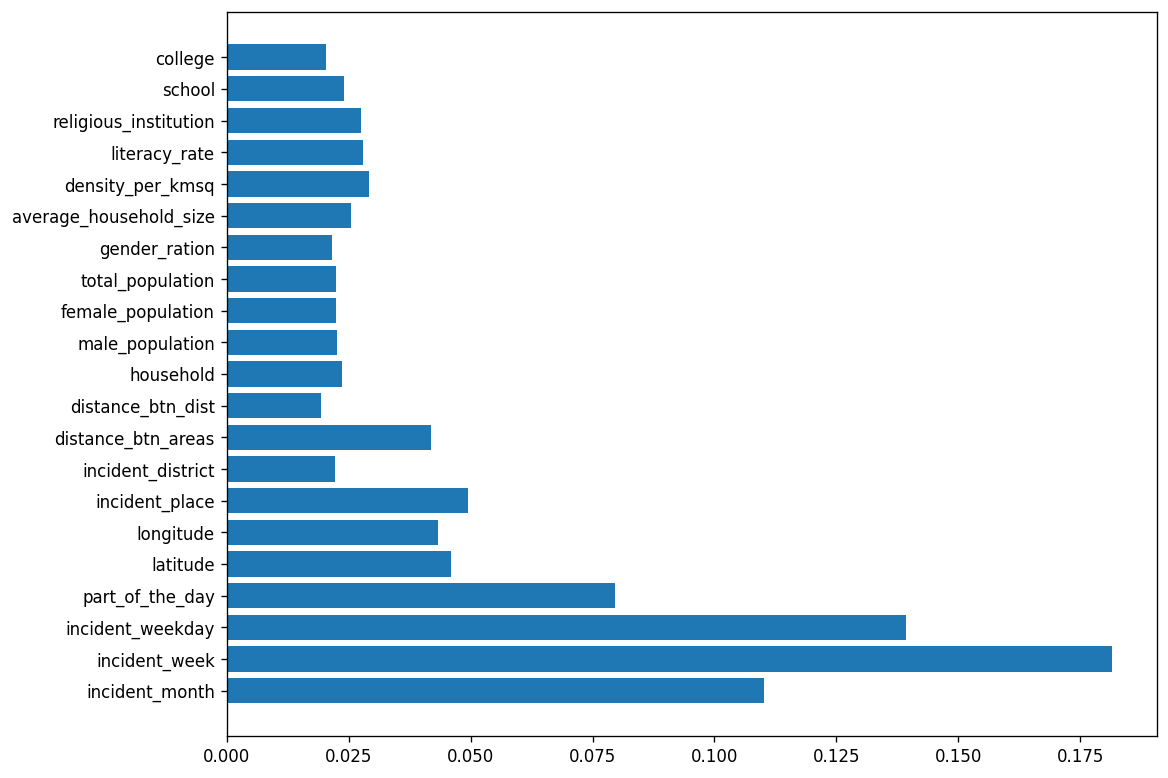

In [89]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [90]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[37 15  4 22 18  6]
 [13 65 16 27 20  9]
 [10 18 16  9  9  2]
 [22 23 12 65 24  8]
 [15 18  1 32 50  8]
 [ 6 15  1  9 16 17]]

Accuracy per Class:
Assault: 36.27450980392157
BodyFound: 43.333333333333336
Kidnap: 25.0
Murder: 42.2077922077922
Rape: 40.32258064516129
Robbery: 26.5625

Accuracy: 0.38

Micro Precision: 0.38
Micro Recall: 0.38
Micro F1-score: 0.38

Macro Precision: 0.37
Macro Recall: 0.36
Macro F1-score: 0.36

Weighted Precision: 0.38
Weighted Recall: 0.38
Weighted F1-score: 0.38
Classification Report

              precision    recall  f1-score   support

     Assault       0.36      0.36      0.36       102
   BodyFound       0.42      0.43      0.43       150
      Kidnap       0.32      0.25      0.28        64
      Murder       0.40      0.42      0.41       154
        Rape       0.36      0.40      0.38       124
     Robbery       0.34      0.27      0.30        64

  

### XGBoost

Feature Importance:


<BarContainer object of 21 artists>

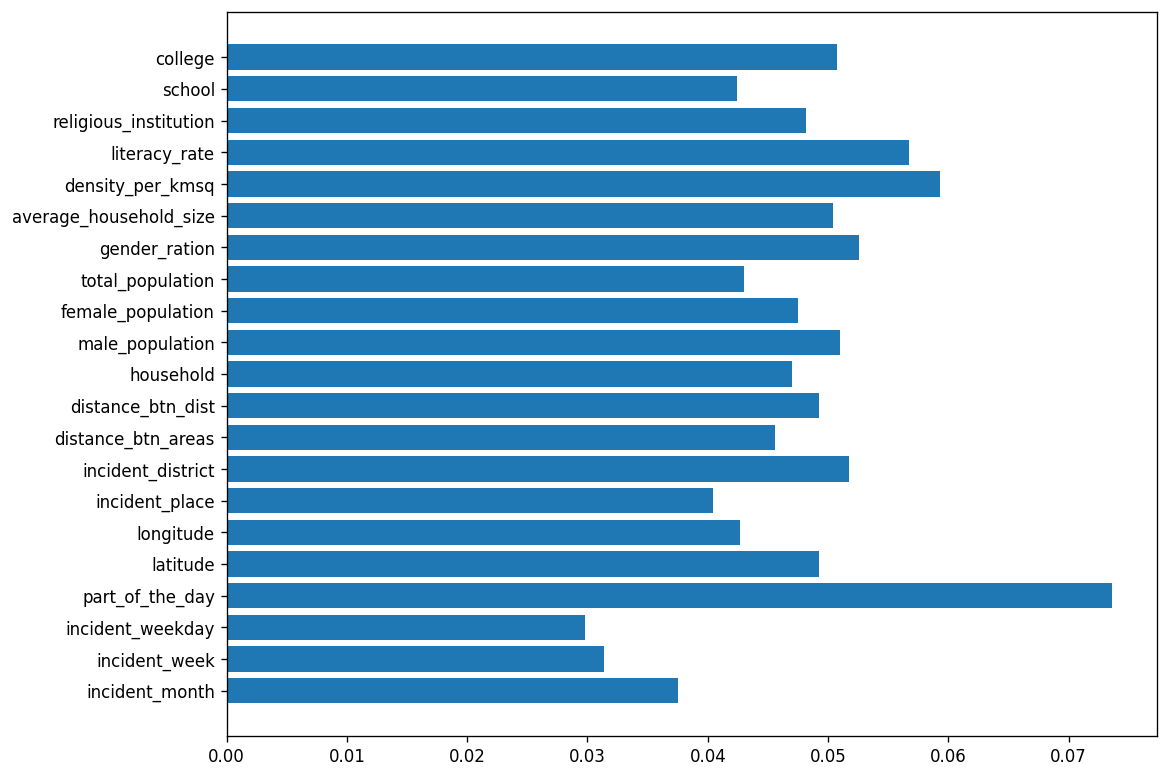

In [91]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 1000)
classifier.fit(X_train, y_train)
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [92]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[39 14  4 20 16  9]
 [17 72 15 21 17  8]
 [ 4 21 18 10  8  3]
 [18 23  9 75 19 10]
 [11 19  6 28 52  8]
 [ 5 12  4 13 12 18]]

Accuracy per Class:
Assault: 38.23529411764706
BodyFound: 48.0
Kidnap: 28.125
Murder: 48.701298701298704
Rape: 41.935483870967744
Robbery: 28.125

Accuracy: 0.42

Micro Precision: 0.42
Micro Recall: 0.42
Micro F1-score: 0.42

Macro Precision: 0.40
Macro Recall: 0.39
Macro F1-score: 0.39

Weighted Precision: 0.41
Weighted Recall: 0.42
Weighted F1-score: 0.41
Classification Report

              precision    recall  f1-score   support

     Assault       0.41      0.38      0.40       102
   BodyFound       0.45      0.48      0.46       150
      Kidnap       0.32      0.28      0.30        64
      Murder       0.45      0.49      0.47       154
        Rape       0.42      0.42      0.42       124
     Robbery       0.32      0.28      0.30        64

    accuracy                           0.42       658
   macro avg     

### SVM

In [ ]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
from sklearn import svm

#### RBF

In [ ]:
classifier_rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [ ]:
y_pred = classifier_rbf.predict(X_test)
y_train_pred = classifier_rbf.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

#### Poly

In [ ]:
classifier_poly = svm.SVC(kernel='poly', degree=10, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [ ]:
y_pred = classifier_poly.predict(X_test)
y_train_pred = classifier_poly.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

#### Sigmoid

In [ ]:
classifier_sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [ ]:
y_pred = classifier_sig.predict(X_test)
y_train_pred = classifier_sig.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

#### Linear

In [ ]:
# classifier_linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [ ]:
# y_pred = classifier_linear.predict(X_test)
# y_train_pred = classifier_linear.predict(X_train)
# print("Test Performance: \n")
# ModelPerformance(y_test,y_pred)
# print("\nTrain Performance: \n")
# ModelPerformance(y_train,y_train_pred)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

### Decision Tree

Feature Importance:


<BarContainer object of 21 artists>

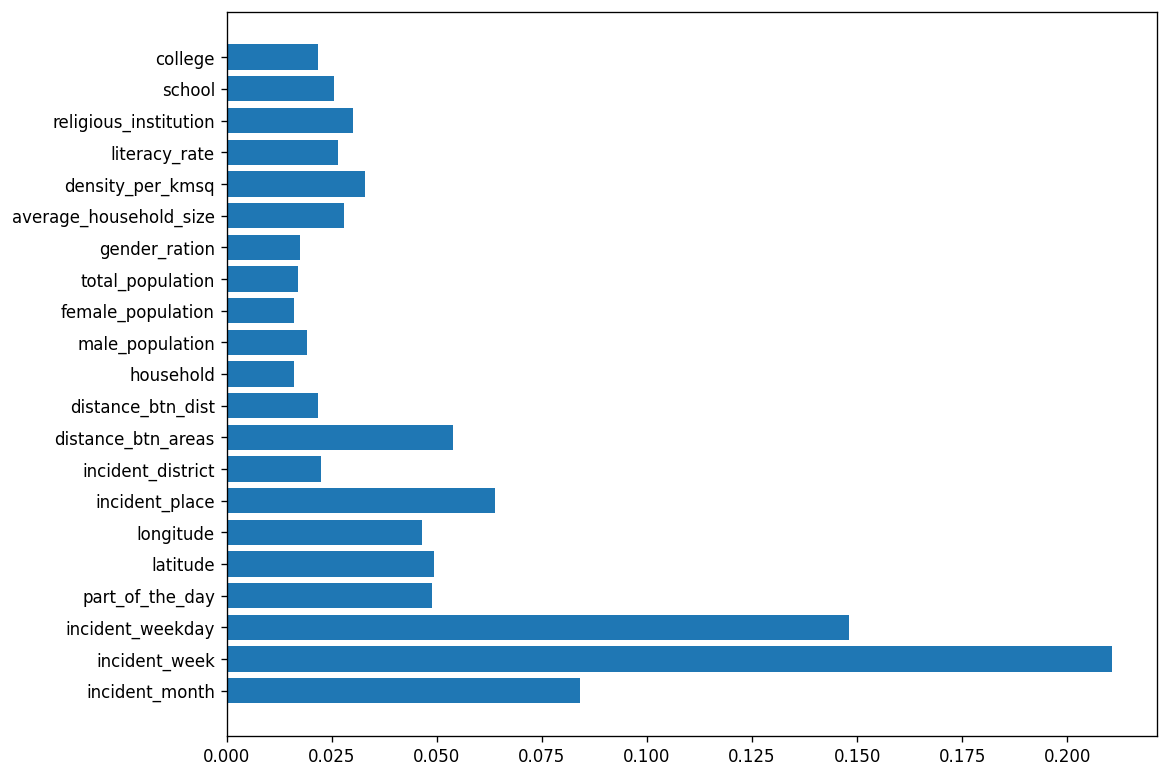

In [93]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 200)
classifier.fit(X_train, y_train)
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [94]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[34 19  5 26 15  3]
 [26 55 15 22 22 10]
 [ 9 12 13 14 12  4]
 [21 24 10 62 23 14]
 [22 17  5 25 47  8]
 [ 9 17  0 14 10 14]]

Accuracy per Class:
Assault: 33.33333333333333
BodyFound: 36.666666666666664
Kidnap: 20.3125
Murder: 40.25974025974026
Rape: 37.903225806451616
Robbery: 21.875

Accuracy: 0.34

Micro Precision: 0.34
Micro Recall: 0.34
Micro F1-score: 0.34

Macro Precision: 0.32
Macro Recall: 0.32
Macro F1-score: 0.32

Weighted Precision: 0.34
Weighted Recall: 0.34
Weighted F1-score: 0.34
Classification Report

              precision    recall  f1-score   support

     Assault       0.28      0.33      0.30       102
   BodyFound       0.38      0.37      0.37       150
      Kidnap       0.27      0.20      0.23        64
      Murder       0.38      0.40      0.39       154
        Rape       0.36      0.38      0.37       124
     Robbery       0.26      0.22      0.24        64

    accuracy                           0.34       658
   

### Ada-Boost

In [95]:
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1)
classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [96]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[16 33  1 39 11  2]
 [18 71  4 29 22  6]
 [ 7 21  6 14 13  3]
 [11 30  3 84 18  8]
 [12 21  2 49 33  7]
 [ 4 15  0 23 15  7]]

Accuracy per Class:
Assault: 15.686274509803921
BodyFound: 47.333333333333336
Kidnap: 9.375
Murder: 54.54545454545454
Rape: 26.61290322580645
Robbery: 10.9375

Accuracy: 0.33

Micro Precision: 0.33
Micro Recall: 0.33
Micro F1-score: 0.33

Macro Precision: 0.31
Macro Recall: 0.27
Macro F1-score: 0.27

Weighted Precision: 0.32
Weighted Recall: 0.33
Weighted F1-score: 0.31
Classification Report

              precision    recall  f1-score   support

     Assault       0.24      0.16      0.19       102
   BodyFound       0.37      0.47      0.42       150
      Kidnap       0.38      0.09      0.15        64
      Murder       0.35      0.55      0.43       154
        Rape       0.29      0.27      0.28       124
     Robbery       0.21      0.11      0.14        64

    accuracy                           0.33       658
   m

### Extra-Tree

In [97]:
classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [98]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[40 19  4 18 16  5]
 [15 59 16 28 24  8]
 [10 21 13  9  8  3]
 [18 19 16 68 24  9]
 [17 16  3 27 52  9]
 [ 6 11  2 12 13 20]]

Accuracy per Class:
Assault: 39.21568627450981
BodyFound: 39.33333333333333
Kidnap: 20.3125
Murder: 44.15584415584416
Rape: 41.935483870967744
Robbery: 31.25

Accuracy: 0.38

Micro Precision: 0.38
Micro Recall: 0.38
Micro F1-score: 0.38

Macro Precision: 0.37
Macro Recall: 0.36
Macro F1-score: 0.36

Weighted Precision: 0.38
Weighted Recall: 0.38
Weighted F1-score: 0.38
Classification Report

              precision    recall  f1-score   support

     Assault       0.38      0.39      0.38       102
   BodyFound       0.41      0.39      0.40       150
      Kidnap       0.24      0.20      0.22        64
      Murder       0.42      0.44      0.43       154
        Rape       0.38      0.42      0.40       124
     Robbery       0.37      0.31      0.34        64

    accuracy                           0.38       658
   ma

## After Removing Demographic Feature

In [99]:
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema','household', 'male_population',
       'female_population', 'total_population', 'gender_ration', 'average_household_size', 'density_per_kmsq', 'literacy_rate', 'religious_institution', 'school', 'college']
X,y = PrepareDataset(df, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 18 artists>

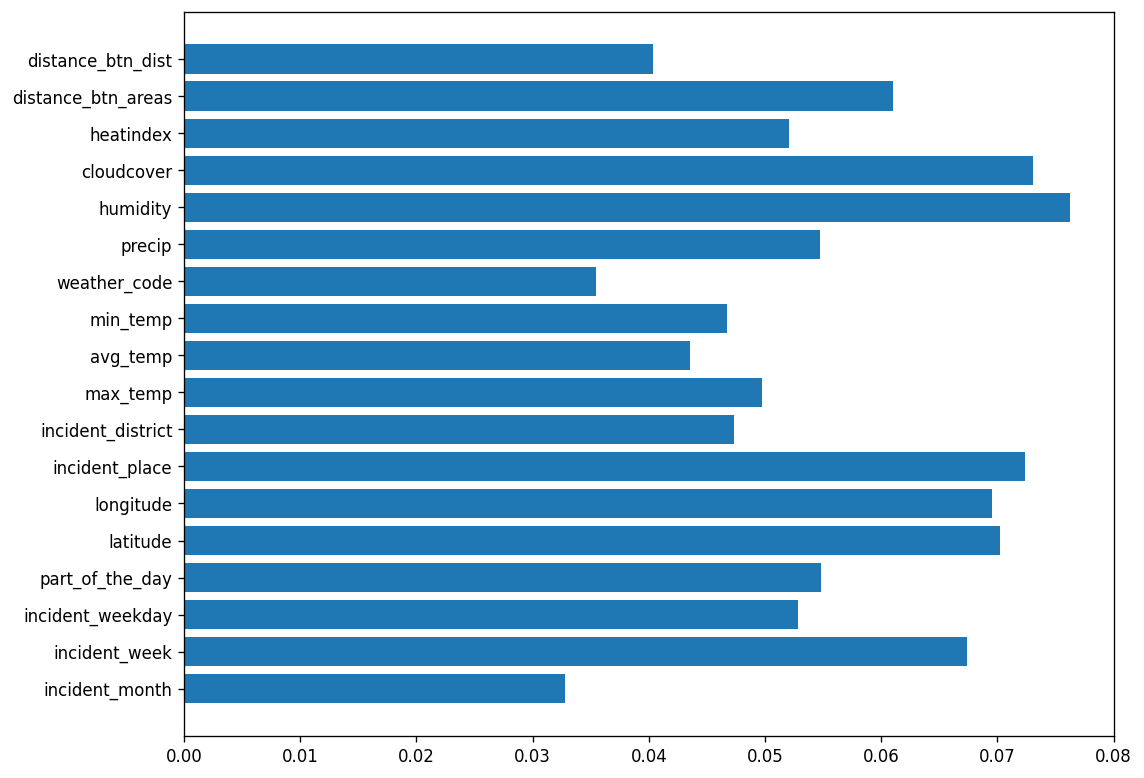

In [101]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [102]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[34 27  0 27 11  3]
 [18 81  1 23 24  3]
 [ 7 25 13 11  7  1]
 [17 27  2 81 25  2]
 [ 8 19  2 38 54  3]
 [ 8 17  0 12 16 11]]

Accuracy per Class:
Assault: 33.33333333333333
BodyFound: 54.0
Kidnap: 20.3125
Murder: 52.5974025974026
Rape: 43.54838709677419
Robbery: 17.1875

Accuracy: 0.42

Micro Precision: 0.42
Micro Recall: 0.42
Micro F1-score: 0.42

Macro Precision: 0.47
Macro Recall: 0.37
Macro F1-score: 0.38

Weighted Precision: 0.44
Weighted Recall: 0.42
Weighted F1-score: 0.40
Classification Report

              precision    recall  f1-score   support

     Assault       0.37      0.33      0.35       102
   BodyFound       0.41      0.54      0.47       150
      Kidnap       0.72      0.20      0.32        64
      Murder       0.42      0.53      0.47       154
        Rape       0.39      0.44      0.41       124
     Robbery       0.48      0.17      0.25        64

    accuracy 

### XGBoost

Feature Importance:


<BarContainer object of 18 artists>

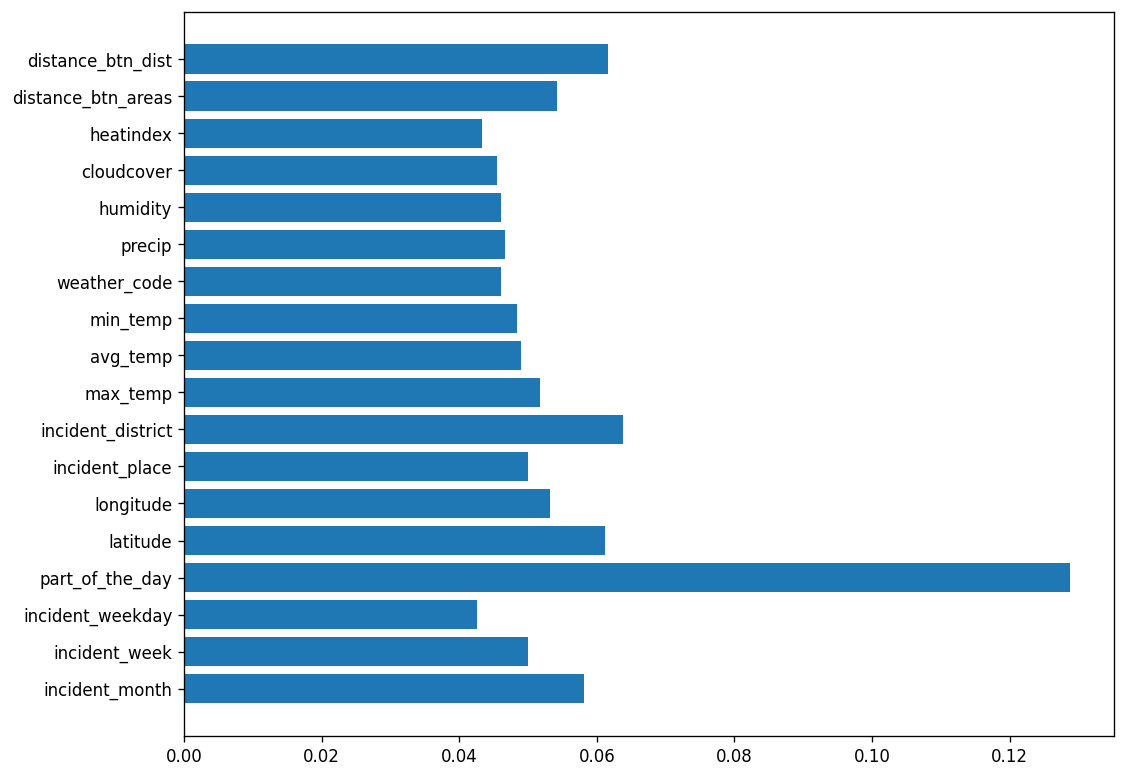

In [103]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 1000)
classifier.fit(X_train, y_train)
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [104]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[31 16  1 34 15  5]
 [24 72  7 26 18  3]
 [ 9 16 15 11 10  3]
 [20 24  2 77 27  4]
 [10 19  6 29 51  9]
 [ 9 17  0 11 12 15]]

Accuracy per Class:
Assault: 30.392156862745097
BodyFound: 48.0
Kidnap: 23.4375
Murder: 50.0
Rape: 41.12903225806452
Robbery: 23.4375

Accuracy: 0.40

Micro Precision: 0.40
Micro Recall: 0.40
Micro F1-score: 0.40

Macro Precision: 0.40
Macro Recall: 0.36
Macro F1-score: 0.37

Weighted Precision: 0.40
Weighted Recall: 0.40
Weighted F1-score: 0.39
Classification Report

              precision    recall  f1-score   support

     Assault       0.30      0.30      0.30       102
   BodyFound       0.44      0.48      0.46       150
      Kidnap       0.48      0.23      0.32        64
      Murder       0.41      0.50      0.45       154
        Rape       0.38      0.41      0.40       124
     Robbery       0.38      0.23      0.29        64

    accuracy                           0.40       658
   macro avg       0.40      

### SVM

In [ ]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
from sklearn import svm

#### RBF

In [ ]:
classifier_rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [ ]:
y_pred = classifier_rbf.predict(X_test)
y_train_pred = classifier_rbf.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

#### Poly

In [ ]:
classifier_poly = svm.SVC(kernel='poly', degree=10, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [ ]:
y_pred = classifier_poly.predict(X_test)
y_train_pred = classifier_poly.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

#### Sigmoid

In [ ]:
classifier_sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [ ]:
y_pred = classifier_sig.predict(X_test)
y_train_pred = classifier_sig.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

#### Linear

In [ ]:
# classifier_linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [ ]:
# y_pred = classifier_linear.predict(X_test)
# y_train_pred = classifier_linear.predict(X_train)
# print("Test Performance: \n")
# ModelPerformance(y_test,y_pred)
# print("\nTrain Performance: \n")
# ModelPerformance(y_train,y_train_pred)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

### Decision Tree

Feature Importance:


<BarContainer object of 18 artists>

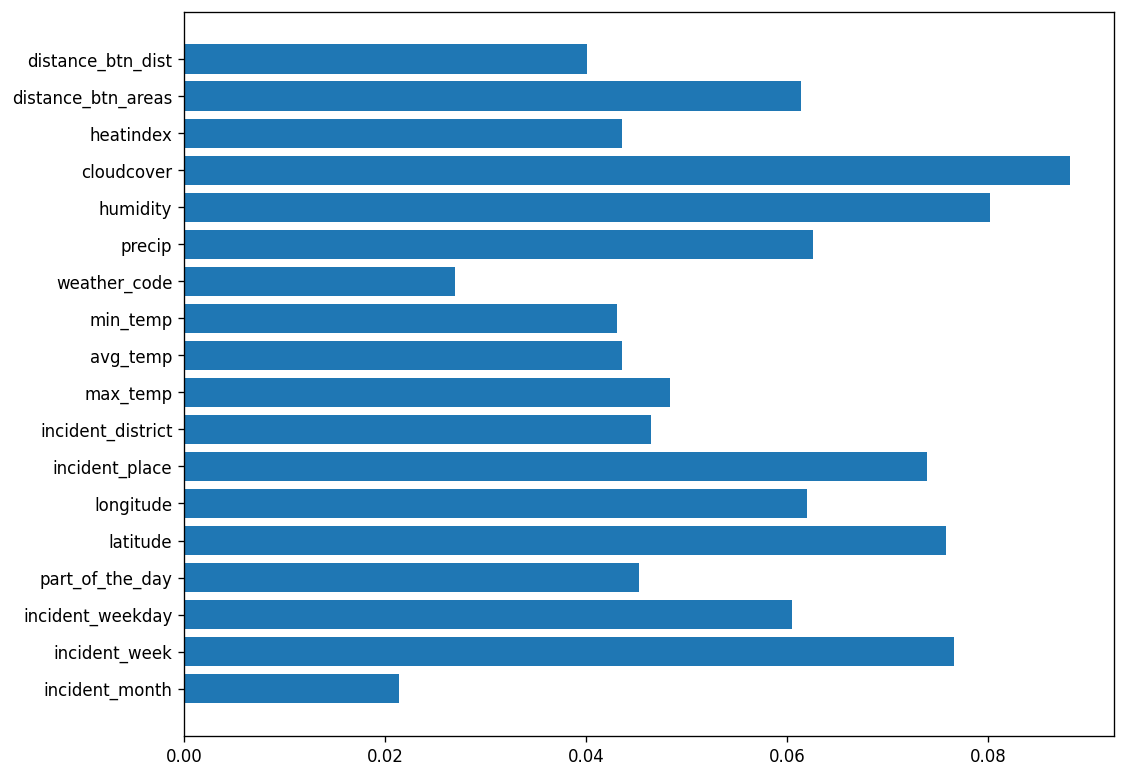

In [105]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 200)
classifier.fit(X_train, y_train)
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [106]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[29 25  9 22 11  6]
 [18 52 15 27 26 12]
 [ 9 11 21 14  8  1]
 [21 17  8 61 37 10]
 [11 16 10 24 51 12]
 [10 13  1 11  9 20]]

Accuracy per Class:
Assault: 28.431372549019606
BodyFound: 34.66666666666667
Kidnap: 32.8125
Murder: 39.61038961038961
Rape: 41.12903225806452
Robbery: 31.25

Accuracy: 0.36

Micro Precision: 0.36
Micro Recall: 0.36
Micro F1-score: 0.36

Macro Precision: 0.35
Macro Recall: 0.35
Macro F1-score: 0.35

Weighted Precision: 0.36
Weighted Recall: 0.36
Weighted F1-score: 0.35
Classification Report

              precision    recall  f1-score   support

     Assault       0.30      0.28      0.29       102
   BodyFound       0.39      0.35      0.37       150
      Kidnap       0.33      0.33      0.33        64
      Murder       0.38      0.40      0.39       154
        Rape       0.36      0.41      0.38       124
     Robbery       0.33      0.31      0.32        64

    accuracy                           0.36       658
   ma

### Ada-Boost

In [107]:
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1)
classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [108]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[15 32  0 39 13  3]
 [13 74  2 31 24  6]
 [ 5 25  3 12 18  1]
 [12 31  1 76 29  5]
 [19 18  2 42 36  7]
 [ 4 16  0 21 11 12]]

Accuracy per Class:
Assault: 14.705882352941178
BodyFound: 49.333333333333336
Kidnap: 4.6875
Murder: 49.35064935064935
Rape: 29.03225806451613
Robbery: 18.75

Accuracy: 0.33

Micro Precision: 0.33
Micro Recall: 0.33
Micro F1-score: 0.33

Macro Precision: 0.32
Macro Recall: 0.28
Macro F1-score: 0.27

Weighted Precision: 0.32
Weighted Recall: 0.33
Weighted F1-score: 0.30
Classification Report

              precision    recall  f1-score   support

     Assault       0.22      0.15      0.18       102
   BodyFound       0.38      0.49      0.43       150
      Kidnap       0.38      0.05      0.08        64
      Murder       0.34      0.49      0.41       154
        Rape       0.27      0.29      0.28       124
     Robbery       0.35      0.19      0.24        64

    accuracy                           0.33       658
   ma

### Extra-Tree

In [109]:
classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [110]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("Test Performance: \n")
ModelPerformance(y_test,y_pred)
print("\nTrain Performance: \n")
ModelPerformance(y_train,y_train_pred)

Test Performance: 

Confusion Matrix:
[[33 25  2 27 10  5]
 [17 79  2 30 19  3]
 [10 18 15 11  9  1]
 [21 27  3 74 26  3]
 [10 19  6 37 48  4]
 [ 9 13  0 11 18 13]]

Accuracy per Class:
Assault: 32.35294117647059
BodyFound: 52.666666666666664
Kidnap: 23.4375
Murder: 48.05194805194805
Rape: 38.70967741935484
Robbery: 20.3125

Accuracy: 0.40

Micro Precision: 0.40
Micro Recall: 0.40
Micro F1-score: 0.40

Macro Precision: 0.42
Macro Recall: 0.36
Macro F1-score: 0.37

Weighted Precision: 0.41
Weighted Recall: 0.40
Weighted F1-score: 0.39
Classification Report

              precision    recall  f1-score   support

     Assault       0.33      0.32      0.33       102
   BodyFound       0.44      0.53      0.48       150
      Kidnap       0.54      0.23      0.33        64
      Murder       0.39      0.48      0.43       154
        Rape       0.37      0.39      0.38       124
     Robbery       0.45      0.20      0.28        64

    accuracy                           0.40       658
   

# Model - Incremental

## 25 %

In [27]:
df_25 = df.sample(frac=0.25)
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema']
X,y = PrepareDataset(df_25, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

In [28]:
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 5000 ,criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
# classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 29 artists>

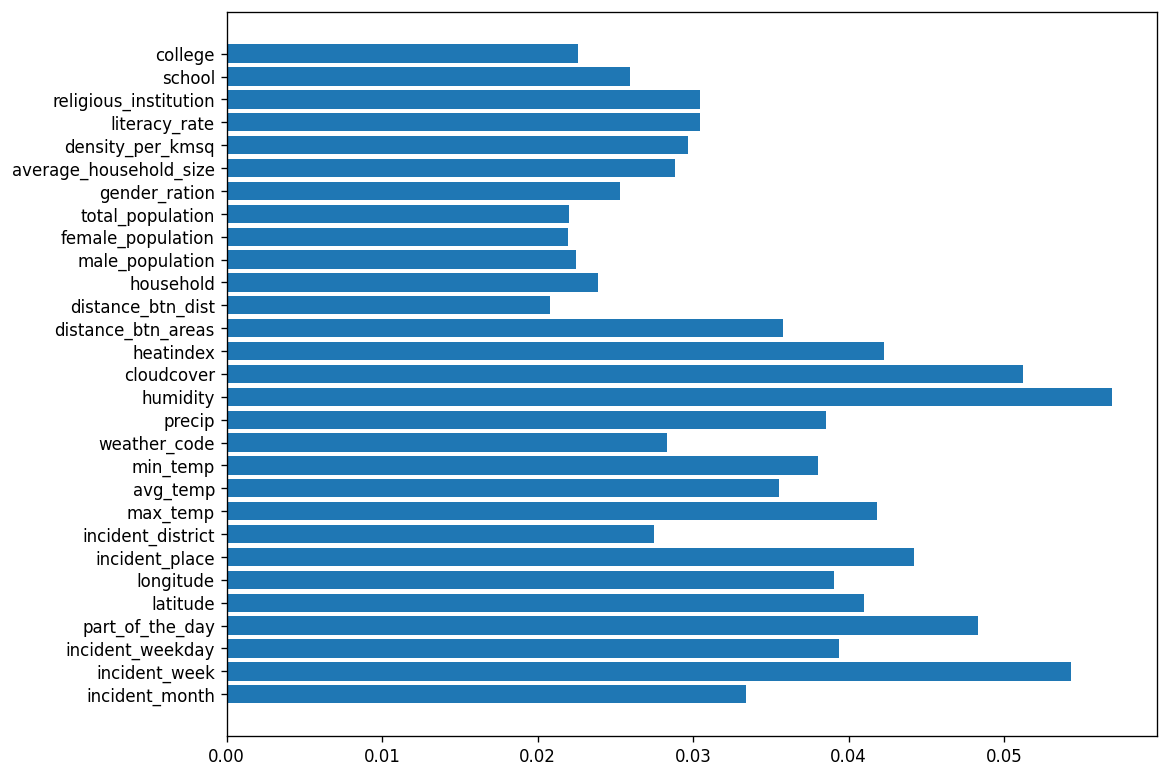

In [29]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [30]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[ 9  8  2  8  1  1]
 [ 8 17  3  9  3  0]
 [ 3  6  3  4  2  1]
 [ 4  8  3 17  5  0]
 [ 6  0  4 13  7  1]
 [ 0  2  0  3  1  3]]

Accuracy per Class:
Assault: 31.03448275862069
BodyFound: 42.5
Kidnap: 15.789473684210526
Murder: 45.94594594594595
Rape: 22.58064516129032
Robbery: 33.33333333333333

Accuracy: 0.34

Micro Precision: 0.34
Micro Recall: 0.34
Micro F1-score: 0.34

Macro Precision: 0.35
Macro Recall: 0.32
Macro F1-score: 0.33

Weighted Precision: 0.34
Weighted Recall: 0.34
Weighted F1-score: 0.33
Classification Report

              precision    recall  f1-score   support

     Assault       0.30      0.31      0.31        29
   BodyFound       0.41      0.42      0.42        40
      Kidnap       0.20      0.16      0.18        19
      Murder       0.31      0.46      0.37        37
        Rape       0.37      0.23      0.28        31
     Robbery       0.50      0.33      0.40   

## 50%

In [31]:
df_50 = df.sample(frac=0.5)
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema']
X,y = PrepareDataset(df_50, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

In [32]:
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 5000 ,criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
# classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 29 artists>

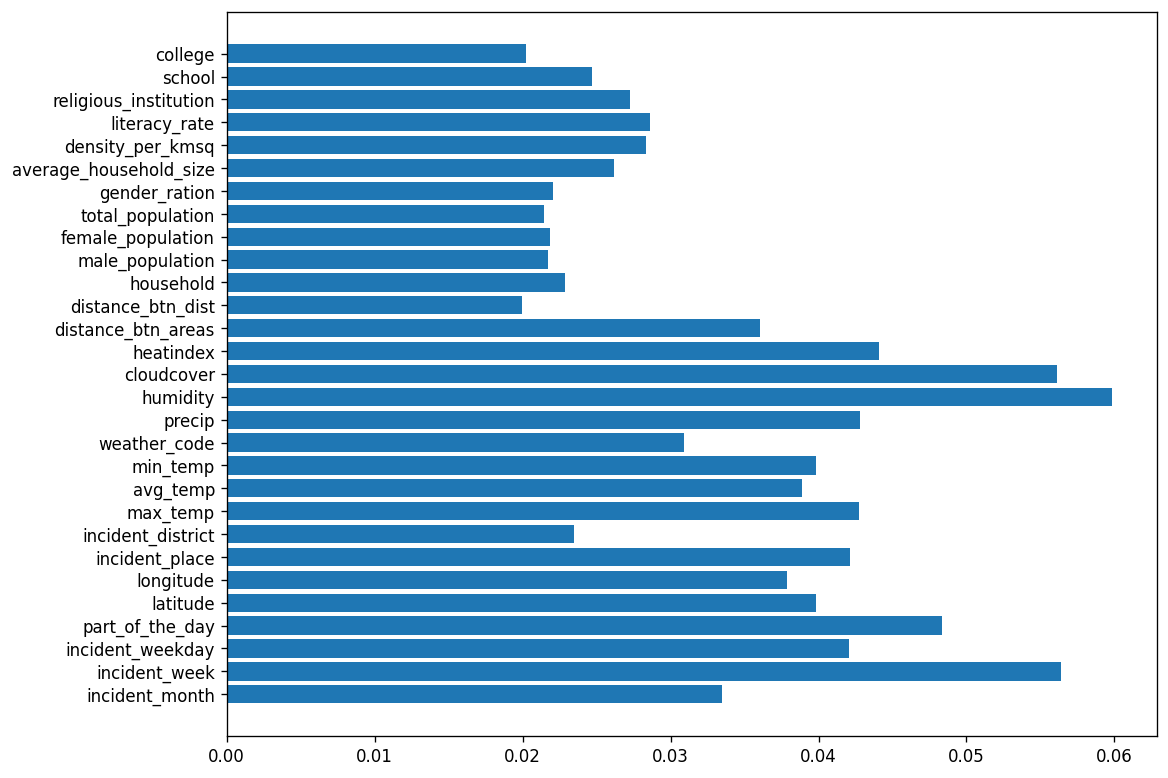

In [33]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [34]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[16 16  2 14  6  4]
 [ 2 42  7 14  3  1]
 [ 4 13  5  6  3  2]
 [ 4 13  2 37  7  4]
 [11 13  3 27 13  0]
 [ 8 10  0  6  4  7]]

Accuracy per Class:
Assault: 27.586206896551722
BodyFound: 60.86956521739131
Kidnap: 15.151515151515152
Murder: 55.223880597014926
Rape: 19.402985074626866
Robbery: 20.0

Accuracy: 0.36

Micro Precision: 0.36
Micro Recall: 0.36
Micro F1-score: 0.36

Macro Precision: 0.35
Macro Recall: 0.33
Macro F1-score: 0.32

Weighted Precision: 0.36
Weighted Recall: 0.36
Weighted F1-score: 0.34
Classification Report

              precision    recall  f1-score   support

     Assault       0.36      0.28      0.31        58
   BodyFound       0.39      0.61      0.48        69
      Kidnap       0.26      0.15      0.19        33
      Murder       0.36      0.55      0.43        67
        Rape       0.36      0.19      0.25        67
     Robbery       0.39      0.20      0.26

## 75%

In [35]:
df_75 = df.sample(frac=0.75)
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema']
X,y = PrepareDataset(df_75, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

In [36]:
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 5000 ,criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
# classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 29 artists>

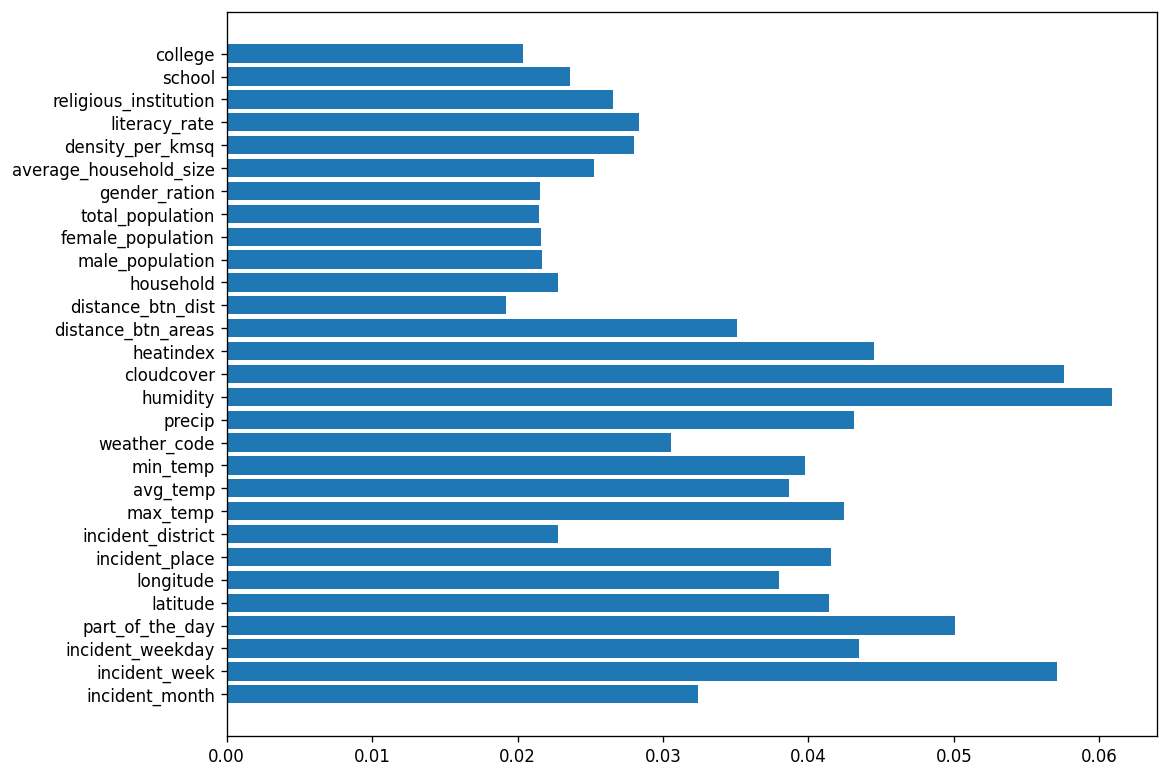

In [37]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [38]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[27 16  3 22  9  4]
 [15 59  5 13 10  0]
 [ 6 21 15 12  8  2]
 [ 6 32  2 53 15  4]
 [10 18  3 21 36  2]
 [ 2 10  0  8 11 13]]

Accuracy per Class:
Assault: 33.33333333333333
BodyFound: 57.84313725490197
Kidnap: 23.4375
Murder: 47.32142857142857
Rape: 40.0
Robbery: 29.545454545454547

Accuracy: 0.41

Micro Precision: 0.41
Micro Recall: 0.41
Micro F1-score: 0.41

Macro Precision: 0.44
Macro Recall: 0.39
Macro F1-score: 0.39

Weighted Precision: 0.43
Weighted Recall: 0.41
Weighted F1-score: 0.40
Classification Report

              precision    recall  f1-score   support

     Assault       0.41      0.33      0.37        81
   BodyFound       0.38      0.58      0.46       102
      Kidnap       0.54      0.23      0.33        64
      Murder       0.41      0.47      0.44       112
        Rape       0.40      0.40      0.40        90
     Robbery       0.52      0.30      0.38        44

 

## 100%

In [39]:
df_100 = df.sample(frac=1)
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema']
X,y = PrepareDataset(df_100, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

In [40]:
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 5000 ,criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
# classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 29 artists>

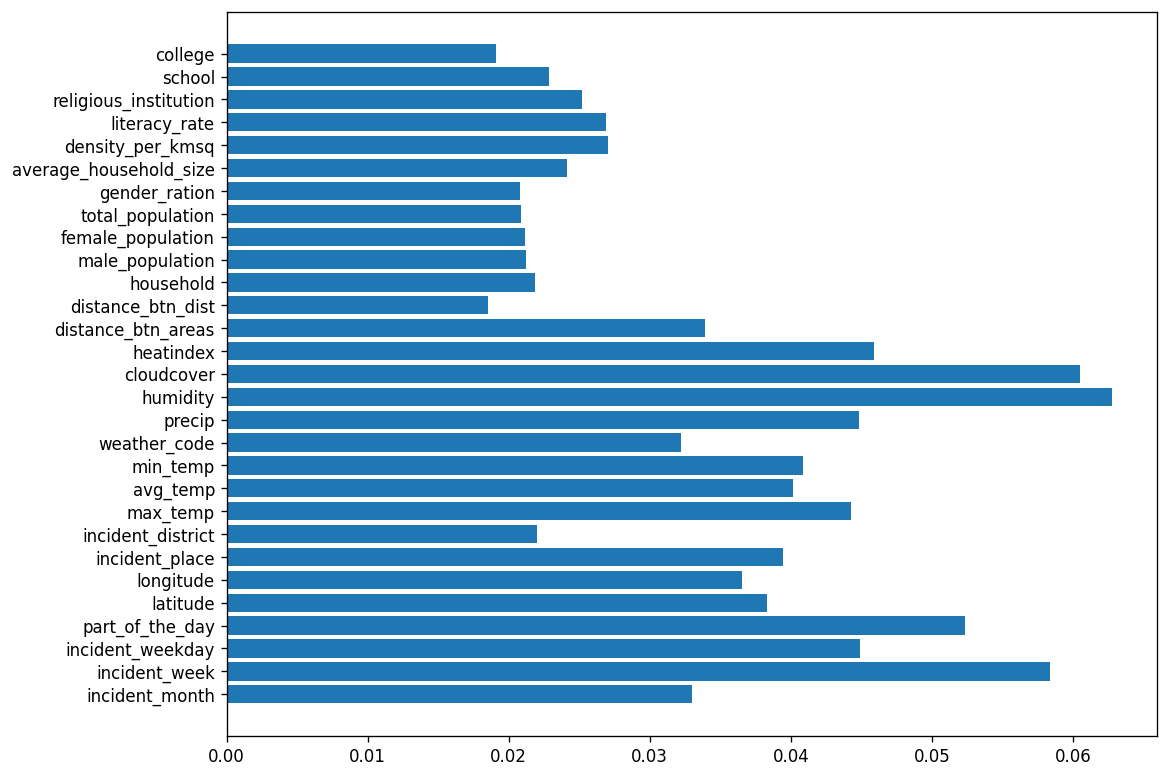

In [41]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [42]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[38 29  2 30 13  7]
 [13 98  7 27 10  4]
 [ 5 28 20  7  7  3]
 [18 23  6 76 21  5]
 [10 21  4 19 45  4]
 [ 9 19  1 13  4 12]]

Accuracy per Class:
Assault: 31.932773109243694
BodyFound: 61.63522012578616
Kidnap: 28.57142857142857
Murder: 51.006711409395976
Rape: 43.689320388349515
Robbery: 20.689655172413794

Accuracy: 0.44

Micro Precision: 0.44
Micro Recall: 0.44
Micro F1-score: 0.44

Macro Precision: 0.43
Macro Recall: 0.40
Macro F1-score: 0.40

Weighted Precision: 0.44
Weighted Recall: 0.44
Weighted F1-score: 0.43
Classification Report

              precision    recall  f1-score   support

     Assault       0.41      0.32      0.36       119
   BodyFound       0.45      0.62      0.52       159
      Kidnap       0.50      0.29      0.36        70
      Murder       0.44      0.51      0.47       149
        Rape       0.45      0.44      0.44       103
     Robbery       0.34      0

## 110%

In [45]:
frames = [df, df.sample(frac=.10)]
df_110 = pd.concat(frames)
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema']
X,y = PrepareDataset(df_110, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

In [46]:
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 5000 ,criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
# classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 29 artists>

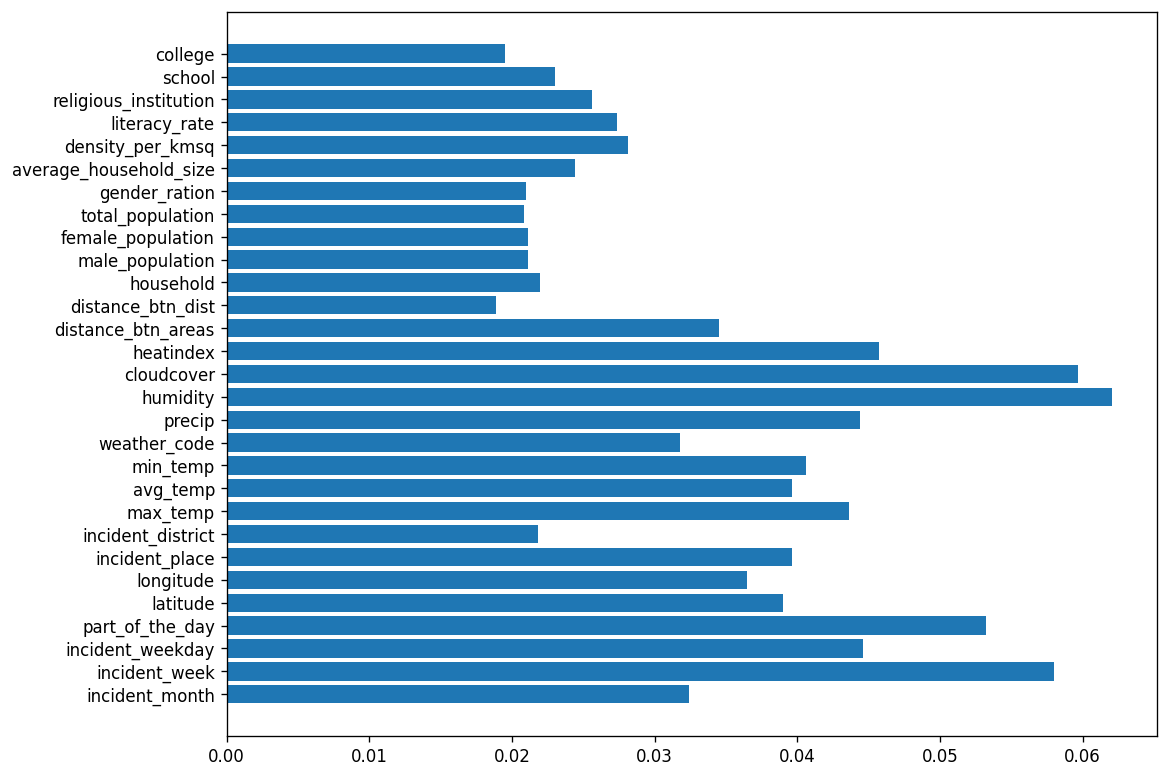

In [47]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [48]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[ 48  27   0  18  18   5]
 [ 19  94   5  18  14   4]
 [  7  27  37   6   6   3]
 [ 11  21   5 113  17   2]
 [  8  17   4  26  58  11]
 [ 12  13   0  13  10  27]]

Accuracy per Class:
Assault: 41.37931034482759
BodyFound: 61.038961038961034
Kidnap: 43.02325581395349
Murder: 66.86390532544378
Rape: 46.774193548387096
Robbery: 36.0

Accuracy: 0.52

Micro Precision: 0.52
Micro Recall: 0.52
Micro F1-score: 0.52

Macro Precision: 0.54
Macro Recall: 0.49
Macro F1-score: 0.50

Weighted Precision: 0.53
Weighted Recall: 0.52
Weighted F1-score: 0.52
Classification Report

              precision    recall  f1-score   support

     Assault       0.46      0.41      0.43       116
   BodyFound       0.47      0.61      0.53       154
      Kidnap       0.73      0.43      0.54        86
      Murder       0.58      0.67      0.62       169
        Rape       0.47      0.47      0.47       124
     Robb

## 120%

In [49]:
frames = [df, df.sample(frac=.20)]
df_120 = pd.concat(frames)
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema']
X,y = PrepareDataset(df_120, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

In [50]:
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 5000 ,criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
# classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 29 artists>

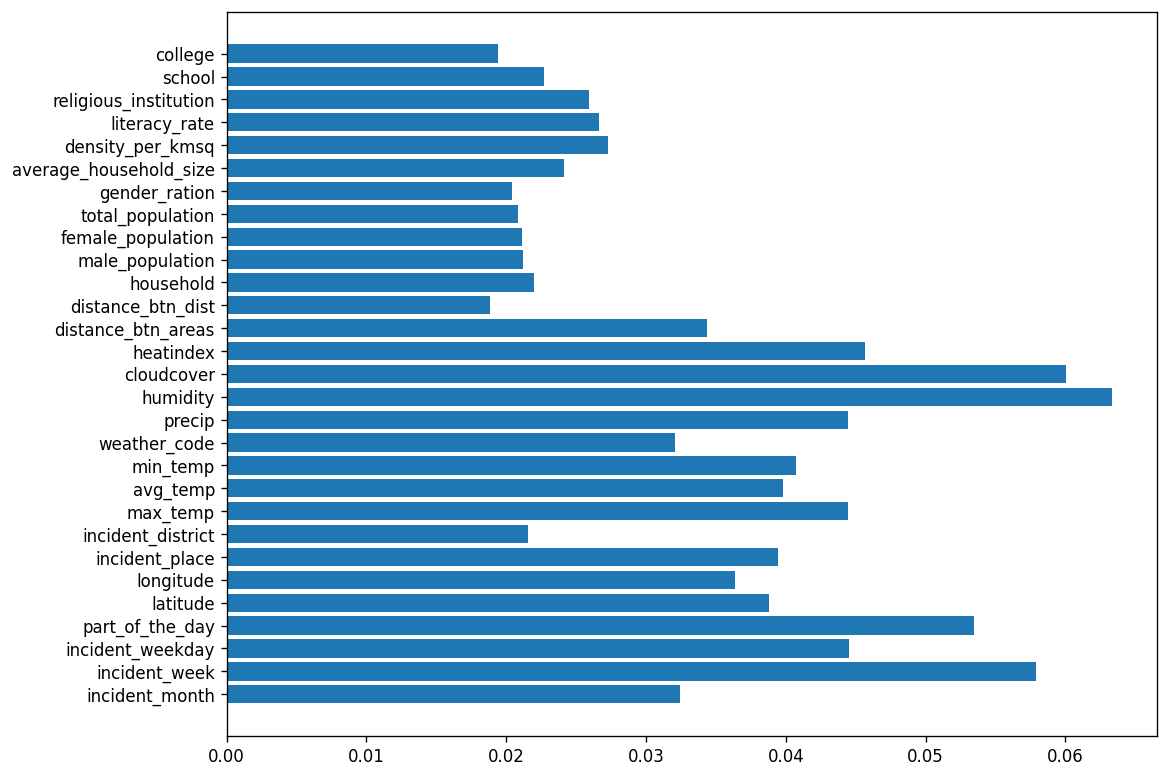

In [51]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [52]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[ 77  25   1  15  15   8]
 [ 17 114   5  16  11   1]
 [  8  22  45   9   4   2]
 [ 13  22   2 113  16  11]
 [  9  20   4  26  82   5]
 [ 10  14   4  11   9  23]]

Accuracy per Class:
Assault: 54.60992907801418
BodyFound: 69.51219512195121
Kidnap: 50.0
Murder: 63.84180790960452
Rape: 56.16438356164384
Robbery: 32.3943661971831

Accuracy: 0.58

Micro Precision: 0.58
Micro Recall: 0.58
Micro F1-score: 0.58

Macro Precision: 0.58
Macro Recall: 0.54
Macro F1-score: 0.55

Weighted Precision: 0.58
Weighted Recall: 0.58
Weighted F1-score: 0.57
Classification Report

              precision    recall  f1-score   support

     Assault       0.57      0.55      0.56       141
   BodyFound       0.53      0.70      0.60       164
      Kidnap       0.74      0.50      0.60        90
      Murder       0.59      0.64      0.62       177
        Rape       0.60      0.56      0.58       146
     Robbery

## 130%

In [53]:
frames = [df, df.sample(frac=.30)]
df_130 = pd.concat(frames)
feature_drop = ['weekend', 'incident_division', 'visibility', 'season', 'weather', 'playground', 'park', 'police_station', 'cyber_cafe', 'cinema']
X,y = PrepareDataset(df_130, feature_drop)
X_train, X_test, y_train, y_test = SplitDataset(X,y, test_size = .10)

In [54]:
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 5000 ,criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'gini', random_state = 0)
# classifier = RandomForestClassifier(n_estimators = 2000 ,criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

Feature Importance:


<BarContainer object of 29 artists>

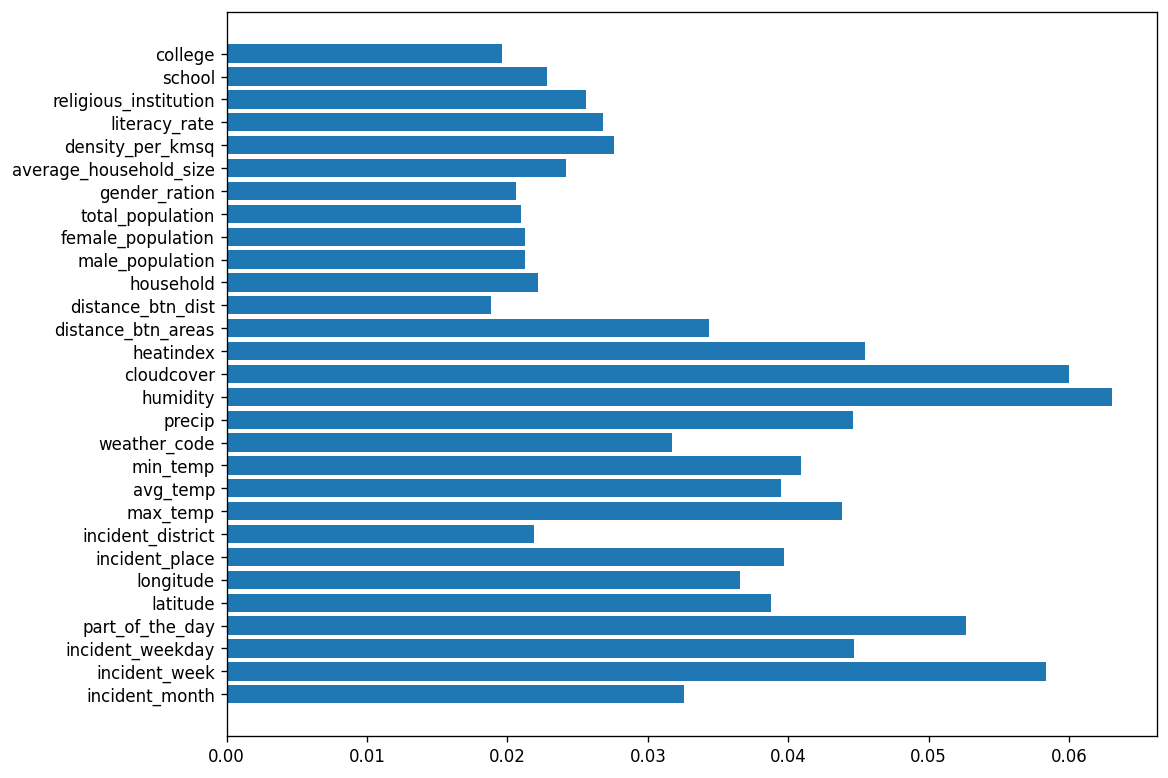

In [55]:
print("Feature Importance:")
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
plt.barh(X.columns, classifier.feature_importances_)

In [56]:
y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print("***************************** Test Performance: *****************************\n")
ModelPerformance(y_test,y_pred)
print("\n***************************** Train Performance: *****************************\n")
ModelPerformance(y_train,y_train_pred)

***************************** Test Performance: *****************************

Confusion Matrix:
[[ 77  23   3  22  12   6]
 [ 11 159   9  11   6   9]
 [  4  22  56  11   4   1]
 [ 13  26   6 136  11   9]
 [  9  15   7  17  87   5]
 [  4  11   0  13   6  34]]

Accuracy per Class:
Assault: 53.84615384615385
BodyFound: 77.5609756097561
Kidnap: 57.14285714285714
Murder: 67.66169154228857
Rape: 62.142857142857146
Robbery: 50.0

Accuracy: 0.64

Micro Precision: 0.64
Micro Recall: 0.64
Micro F1-score: 0.64

Macro Precision: 0.64
Macro Recall: 0.61
Macro F1-score: 0.62

Weighted Precision: 0.64
Weighted Recall: 0.64
Weighted F1-score: 0.64
Classification Report

              precision    recall  f1-score   support

     Assault       0.65      0.54      0.59       143
   BodyFound       0.62      0.78      0.69       205
      Kidnap       0.69      0.57      0.63        98
      Murder       0.65      0.68      0.66       201
        Rape       0.69      0.62      0.65       140
     Robber